In [13]:
%config IPCompleter.greedy=True
%pylab inline

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


# Music Genre Classification - Dataset Analysis

## Numerical and Graphical Descriptive analysis


In [14]:
dataset_file = "datasets/data-v1.csv"

df = pd.read_csv(dataset_file, sep=",")
df.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.380795,0.124698,1883.001208,1865.303842,3878.803772,0.101184,-162.754063,121.255273,-29.199931,54.109434,...,-7.320438,3.900521,-2.205811,-2.243190,1.619559,-5.134632,3.043665,-6.634297,5.002622,-7.852236
std,0.082699,0.062342,522.242739,339.144108,1096.400581,0.039370,95.151859,23.111192,20.168244,16.110998,...,5.512331,5.395750,4.365042,3.977097,3.694564,3.984223,4.333503,4.096735,4.316616,4.287511
min,0.171805,0.005014,549.065530,796.514455,710.220705,0.021877,-556.024780,42.361320,-99.755829,-3.247742,...,-32.414146,-14.018186,-20.763159,-16.360909,-12.323302,-19.637094,-12.697938,-18.963448,-13.177314,-22.937521
25%,0.321059,0.082679,1461.113254,1643.098517,3034.883732,0.071043,-213.648769,104.958897,-42.612360,45.396466,...,-11.082822,0.603397,-5.172873,-4.874094,-0.737182,-7.606263,0.300295,-9.524103,2.242899,-10.705755
50%,0.385390,0.116670,1926.222388,1943.105990,4064.821254,0.097405,-138.674522,118.840340,-30.713336,54.597818,...,-7.538498,4.457320,-2.305679,-2.279468,1.757869,-5.469918,3.286095,-6.899161,5.105744,-8.184787
75%,0.439446,0.167502,2277.180673,2110.350537,4748.075456,0.128231,-95.242519,135.433762,-17.951447,64.680765,...,-3.929274,7.729157,0.444397,0.385467,4.065663,-2.710800,5.842021,-4.012571,8.109790,-5.197460
max,0.667248,0.378549,3369.517356,2611.325445,6268.003765,0.257681,15.127309,197.522858,55.721581,98.046173,...,11.871216,17.391365,13.880814,10.114944,17.297344,9.187266,22.280184,11.137421,22.338120,10.675509


#### Project questions

**Q.8 What are the features types (numeric/textual/visual)?**

The dataset doesn't contain any null/nan values and every feature is quantitive continuous (except filename and label which are strings).

## Feature Correlation

The features of this dataset being continuous but with different scales we will use Pearson's correlation.

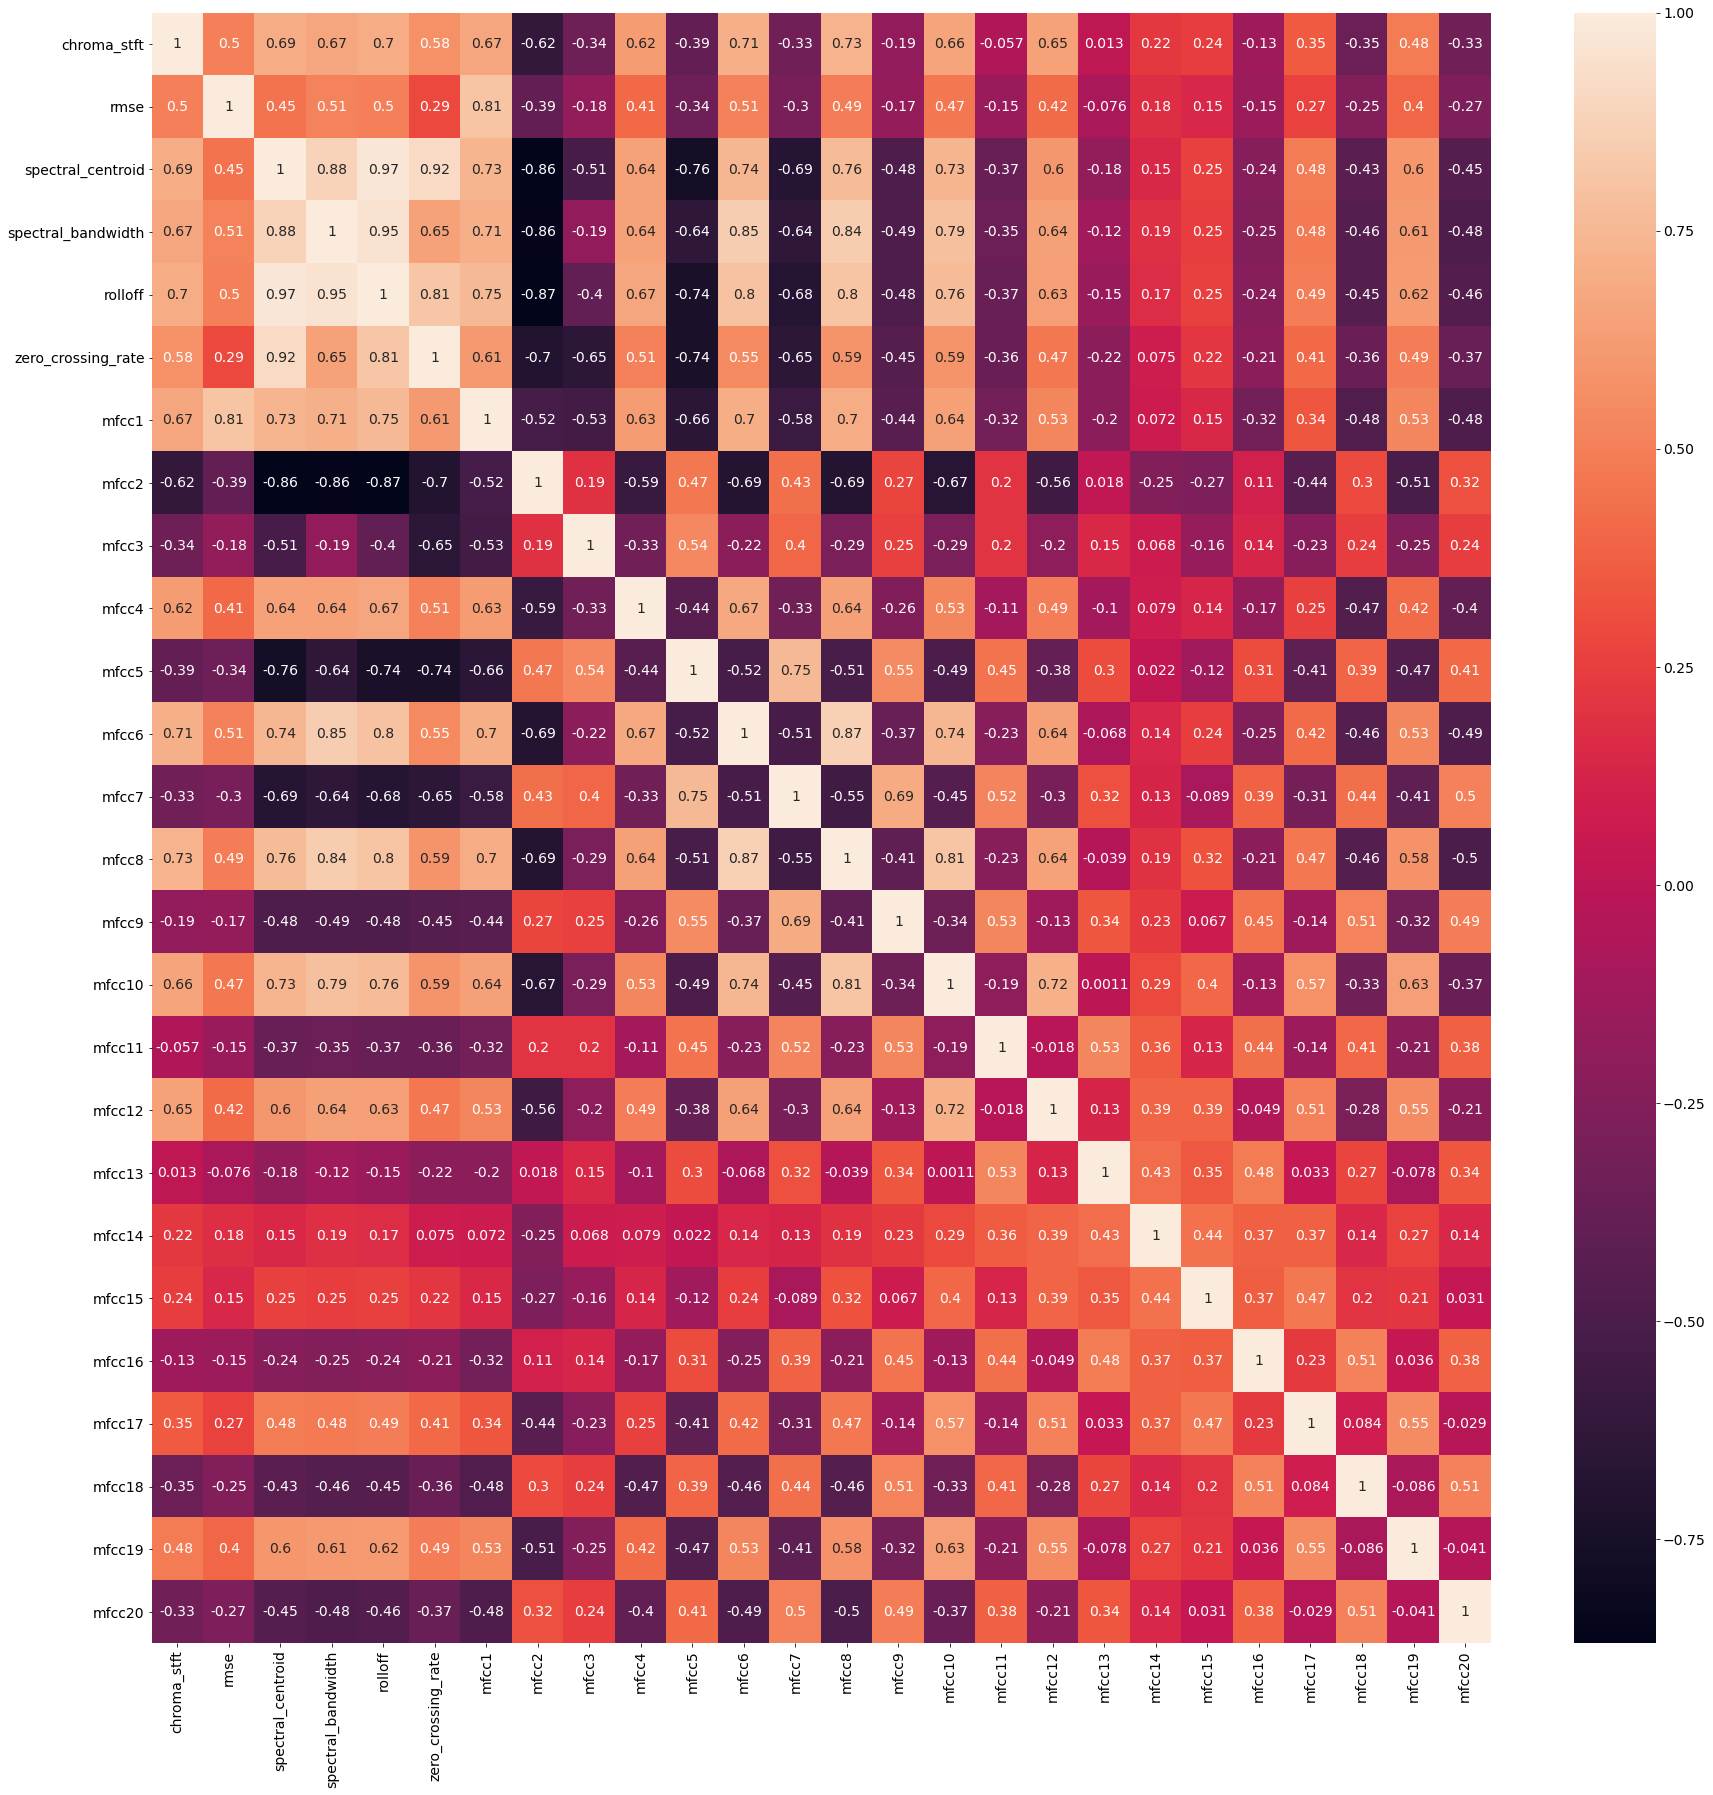

In [15]:
corrMatrix = df.corr(method="pearson")

fig, ax = plt.subplots(figsize=(30,30))   
ax = sb.heatmap(corrMatrix, annot=True)
plt.show()

## Group visualisation

In [16]:
from sklearn import preprocessing

X = df.drop(["label", "filename"], axis=1).values

std_scale = preprocessing.StandardScaler().fit(X) # applying feature scaling because PCA uses euclidean distance to ocompute clusters

X = std_scale.transform(X)

y = df["label"].values

Using kmeans to seperate data into n clusters determined by silhouette score without using genre labels.

In [17]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

def show_pca(X, y, title="", k_clusters_start=5):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    le = preprocessing.LabelEncoder()
    le.fit(y)

    y_encoded = le.transform(y)

    fig, ax = plt.subplots(1, figsize=(30,20))
    
    fig.suptitle(title, fontsize=30)
    scatter0 = ax.scatter(X_pca[:,0], X_pca[:,1], c=y_encoded, s=30,cmap=plt.get_cmap("Paired"))

    # Produce a legend with the unique colors from the scatter
    legend0 = ax.legend(*scatter0.legend_elements(),
                        loc="lower left", title="Classes")

    # Convert legend text
    for i in range(len(legend0.get_texts())):
        legend0.get_texts()[i].set_text(str(le.inverse_transform([i])[0]))
    
    ax.add_artist(legend0)
    ax.set_title("Plot of the PCA with dataset classes")

    plt.show()
    

### Plotting dataset by using PCA

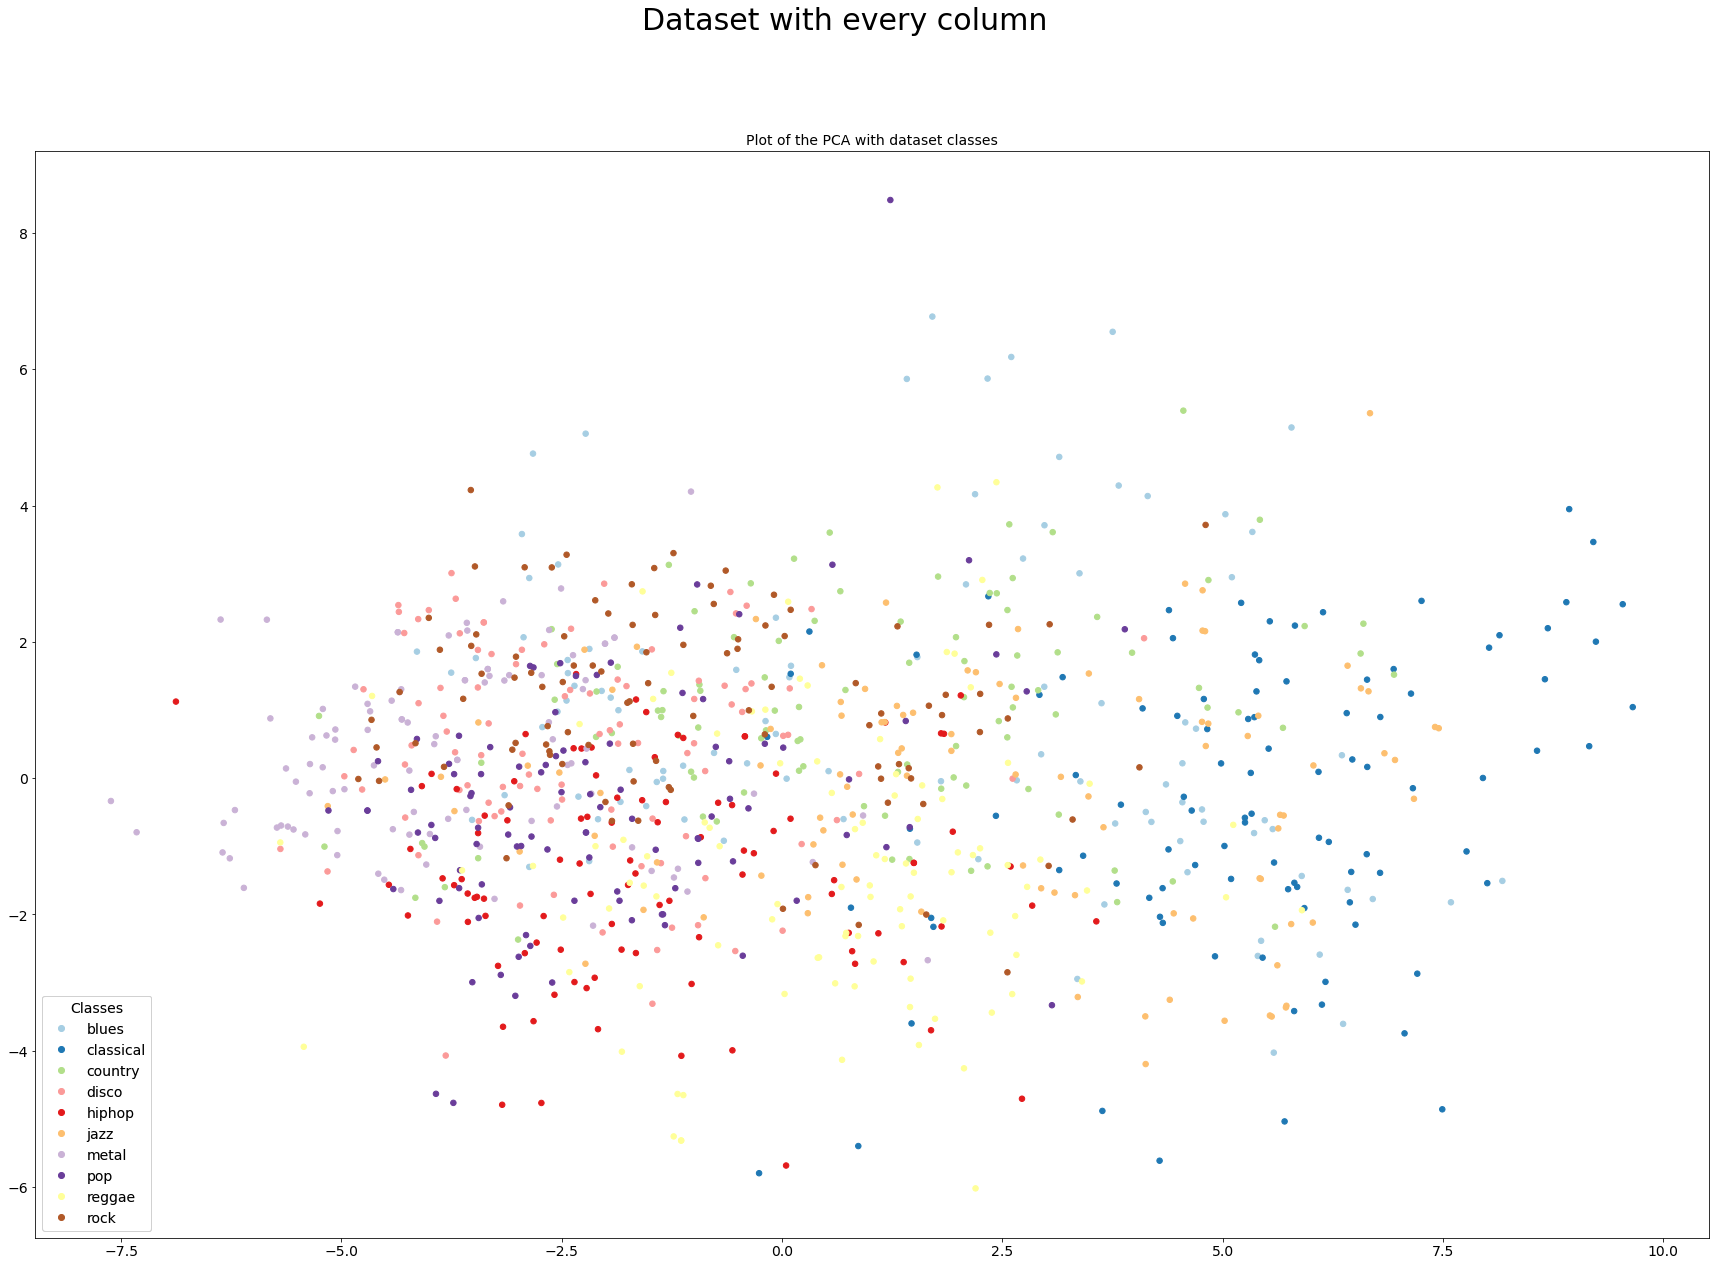

In [18]:
show_pca(X, y, "Dataset with every column")

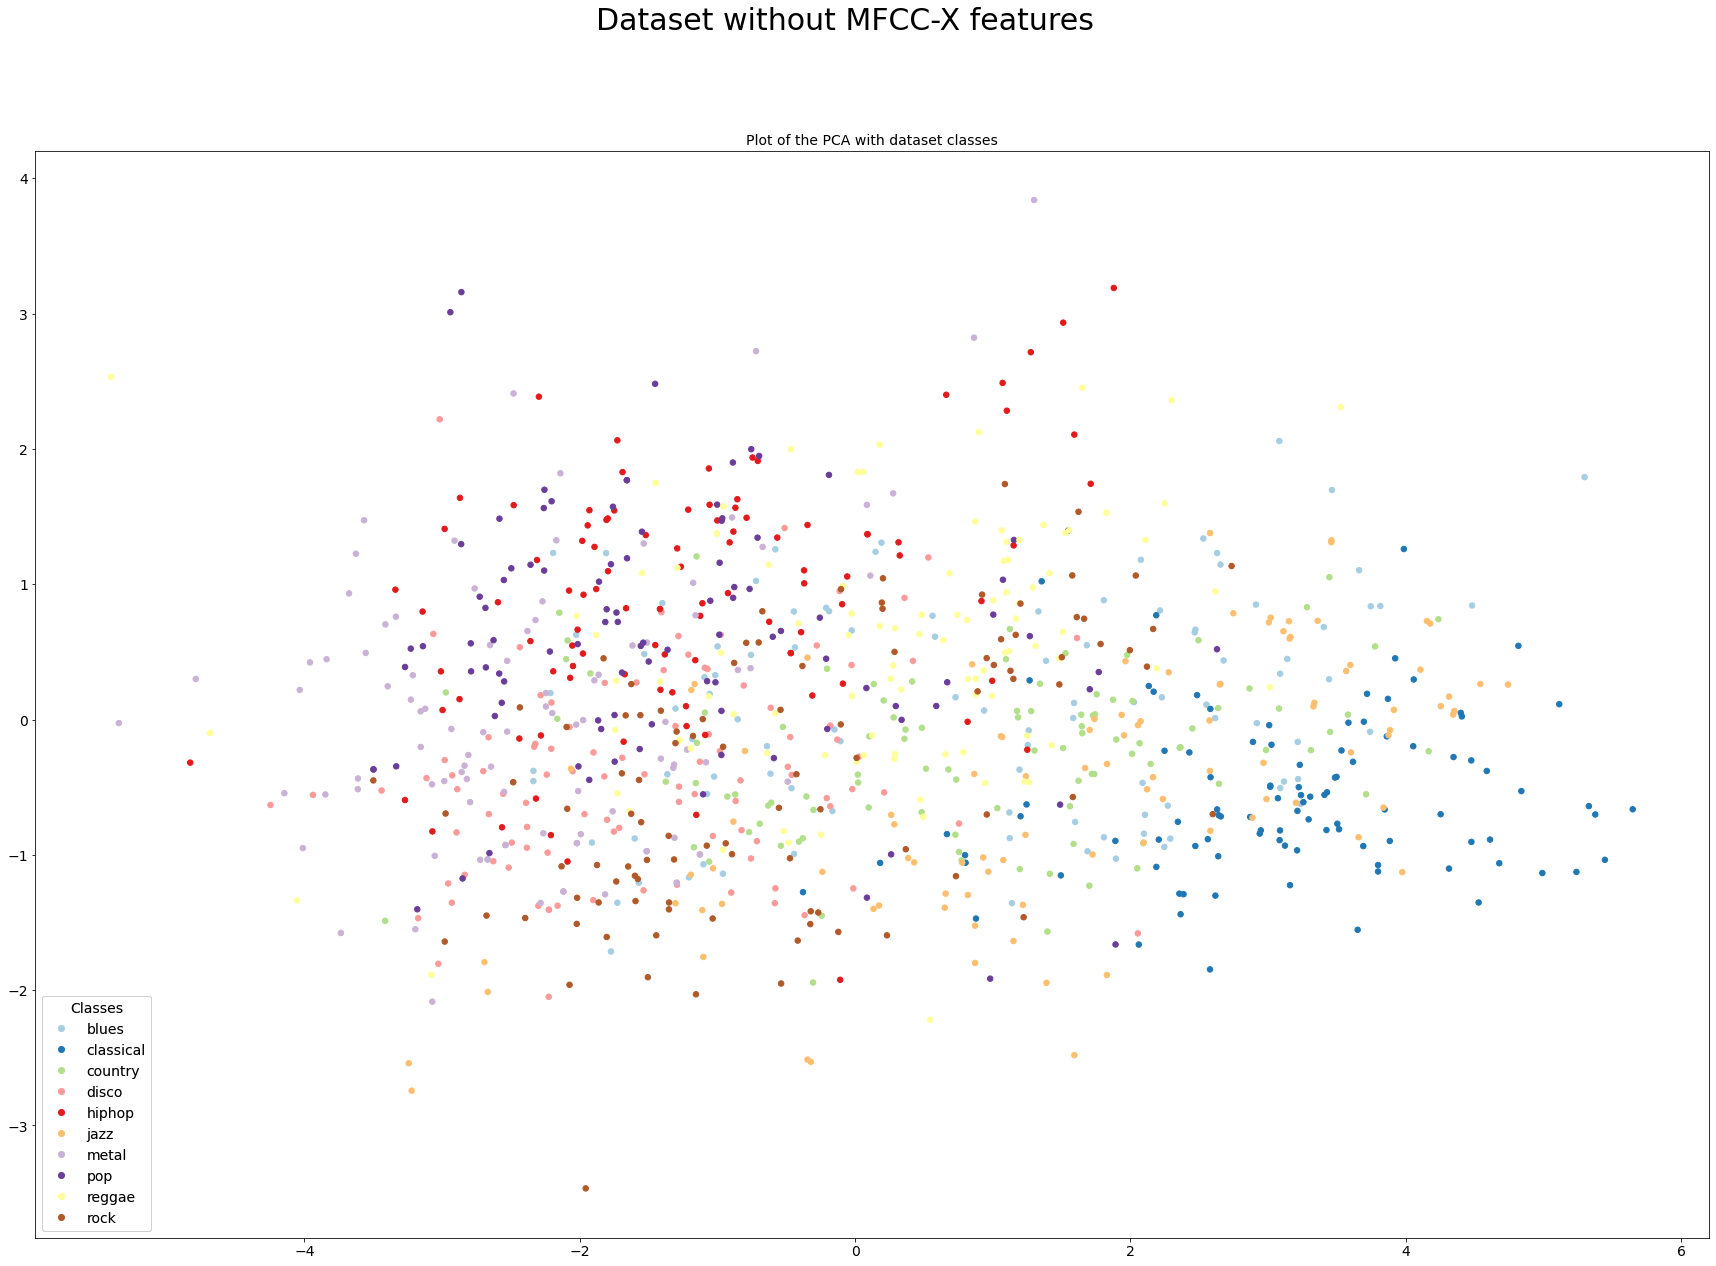

In [19]:
X_less_features = preprocessing.StandardScaler().fit_transform(df.drop(["label", "filename", "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16", "mfcc17", "mfcc18", "mfcc19","mfcc20"], axis=1).values)

show_pca(X_less_features, y, "Dataset without MFCC-X features")


## Descriptive Summaries

In [20]:
def plot_histograms(df, feature_name):
    fig, ax = plt.subplots(figsize=(30,20))
    df[feature_name].hist(by=df['label'], figsize=(20,12), ax=ax)
    fig.suptitle("%s histogram by class" % feature_name, fontsize=30)
    plt.show()


def plot_boxes(df, feature_name):
    fig, ax = plt.subplots(figsize=(15,10))
    plt.suptitle("%s boxplot by class" % feature_name, fontsize=20)
    df.boxplot(column=[feature_name], by='label', ax=ax)
    plt.show()

### spectral_centroid

#### Histogram

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:357: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


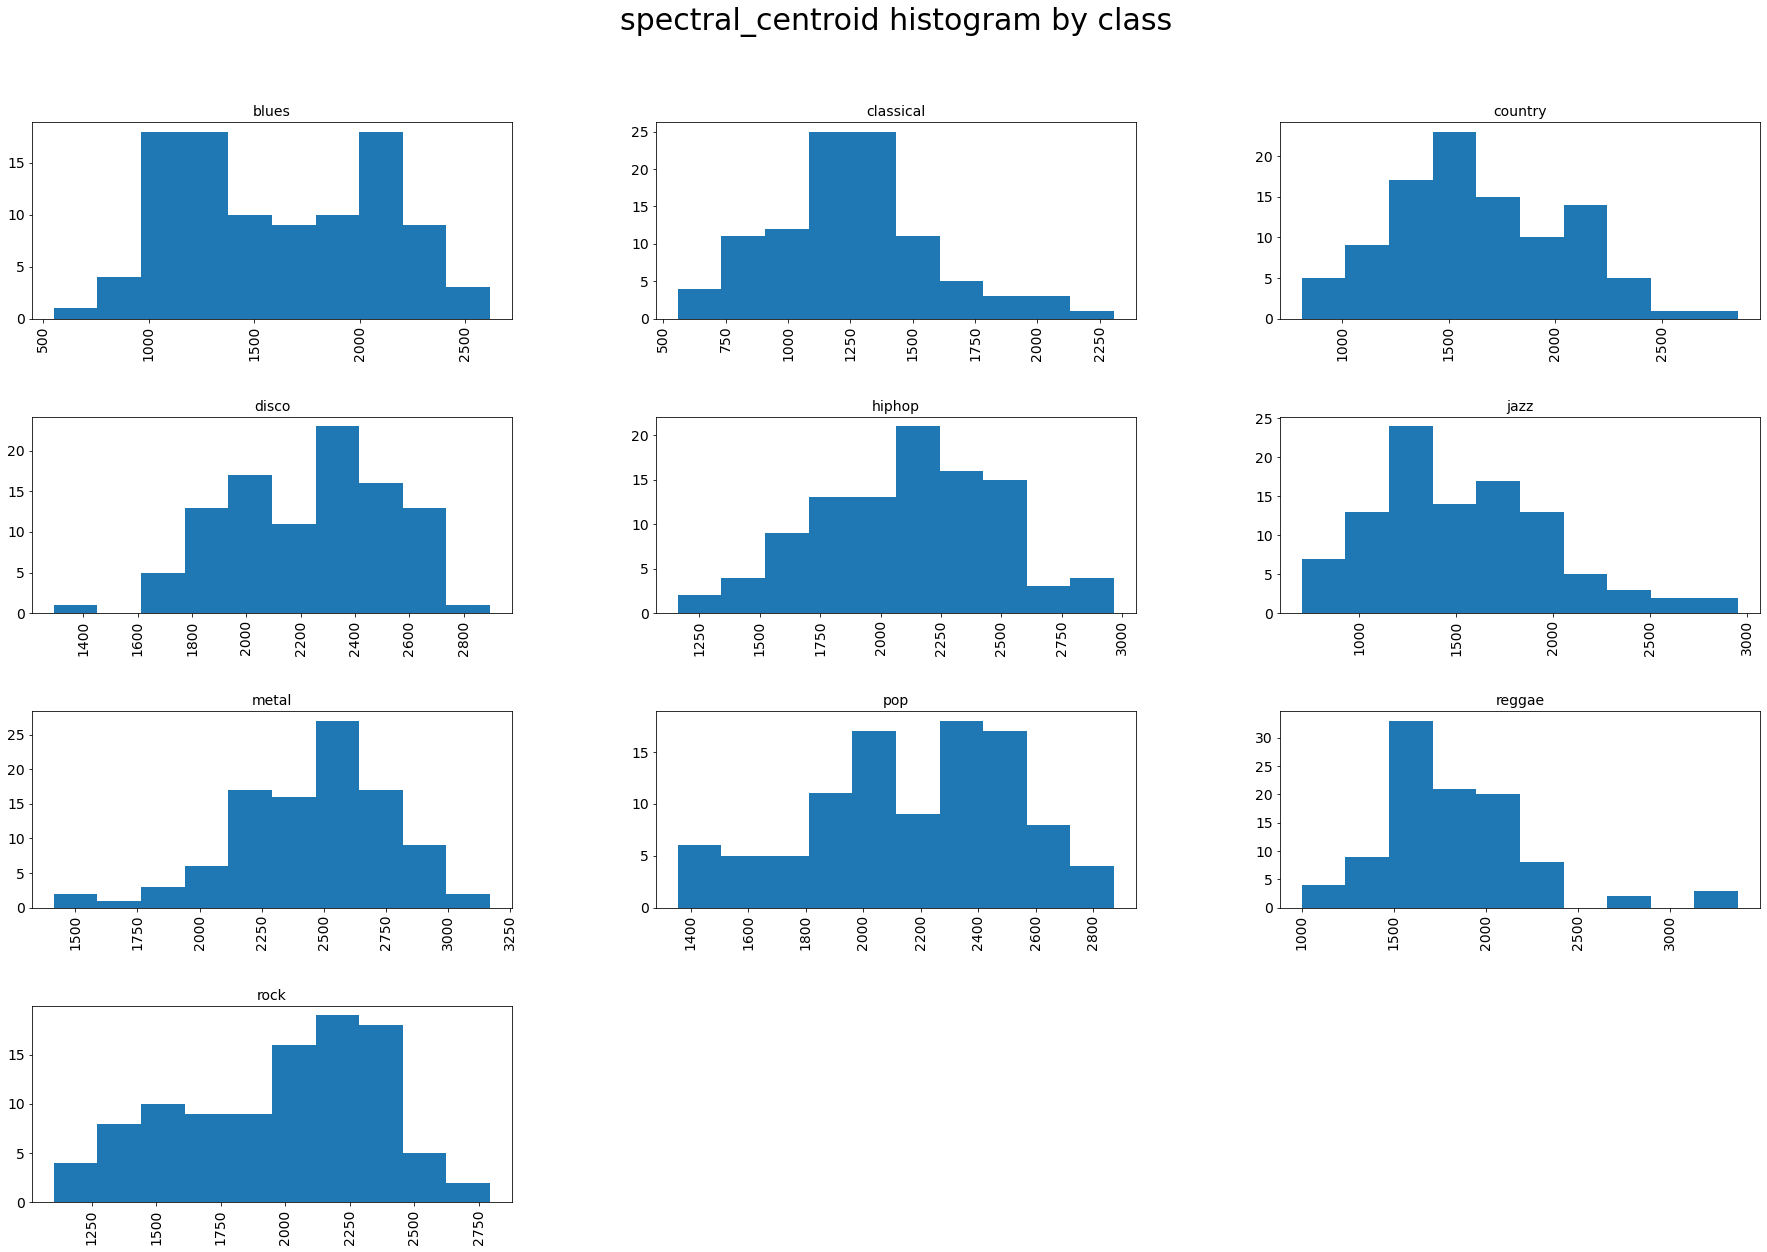

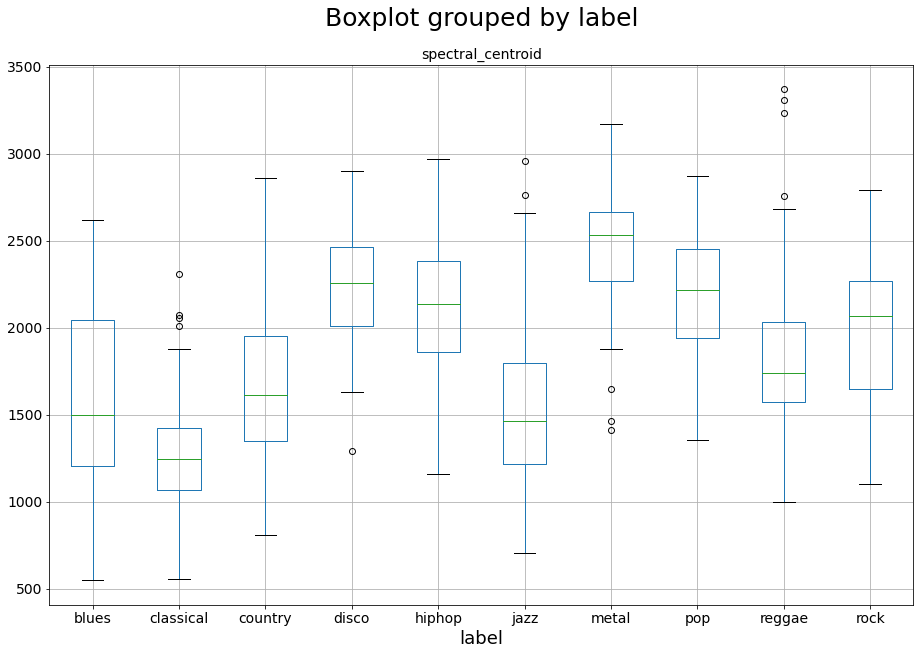

In [21]:
plot_histograms(df, "spectral_centroid")
plot_boxes(df, "spectral_centroid")

#### Project questions

**Q12. How does the Spectral Centroid (center of mass of the spectrogram) vary within a genre?**

The range of the Spectral Centraoid within a genre is large (a difference of 1000-2000 at least between min and max values of a genre), but 50% of songs within a "genre" are grouped together on a much smaller ranges.


**Q13. How does the Spectral Centroid (center of mass of the spectrogram) vary between genres ?**

The median for every genre is centered over except for reggae and metal. 

In terms of histogram, some genres like hiphop are, jazz or metal follow a positively or negatively skewed distribution wheras the others don't follow a normal distribution. 

However classical, reggae and metal have a lot of outliers. 

Classical in terms of the spectral centroid has 50% of its invididuals with a lower value than every other genre except (Jazz).




### chroma_stft

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:357: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


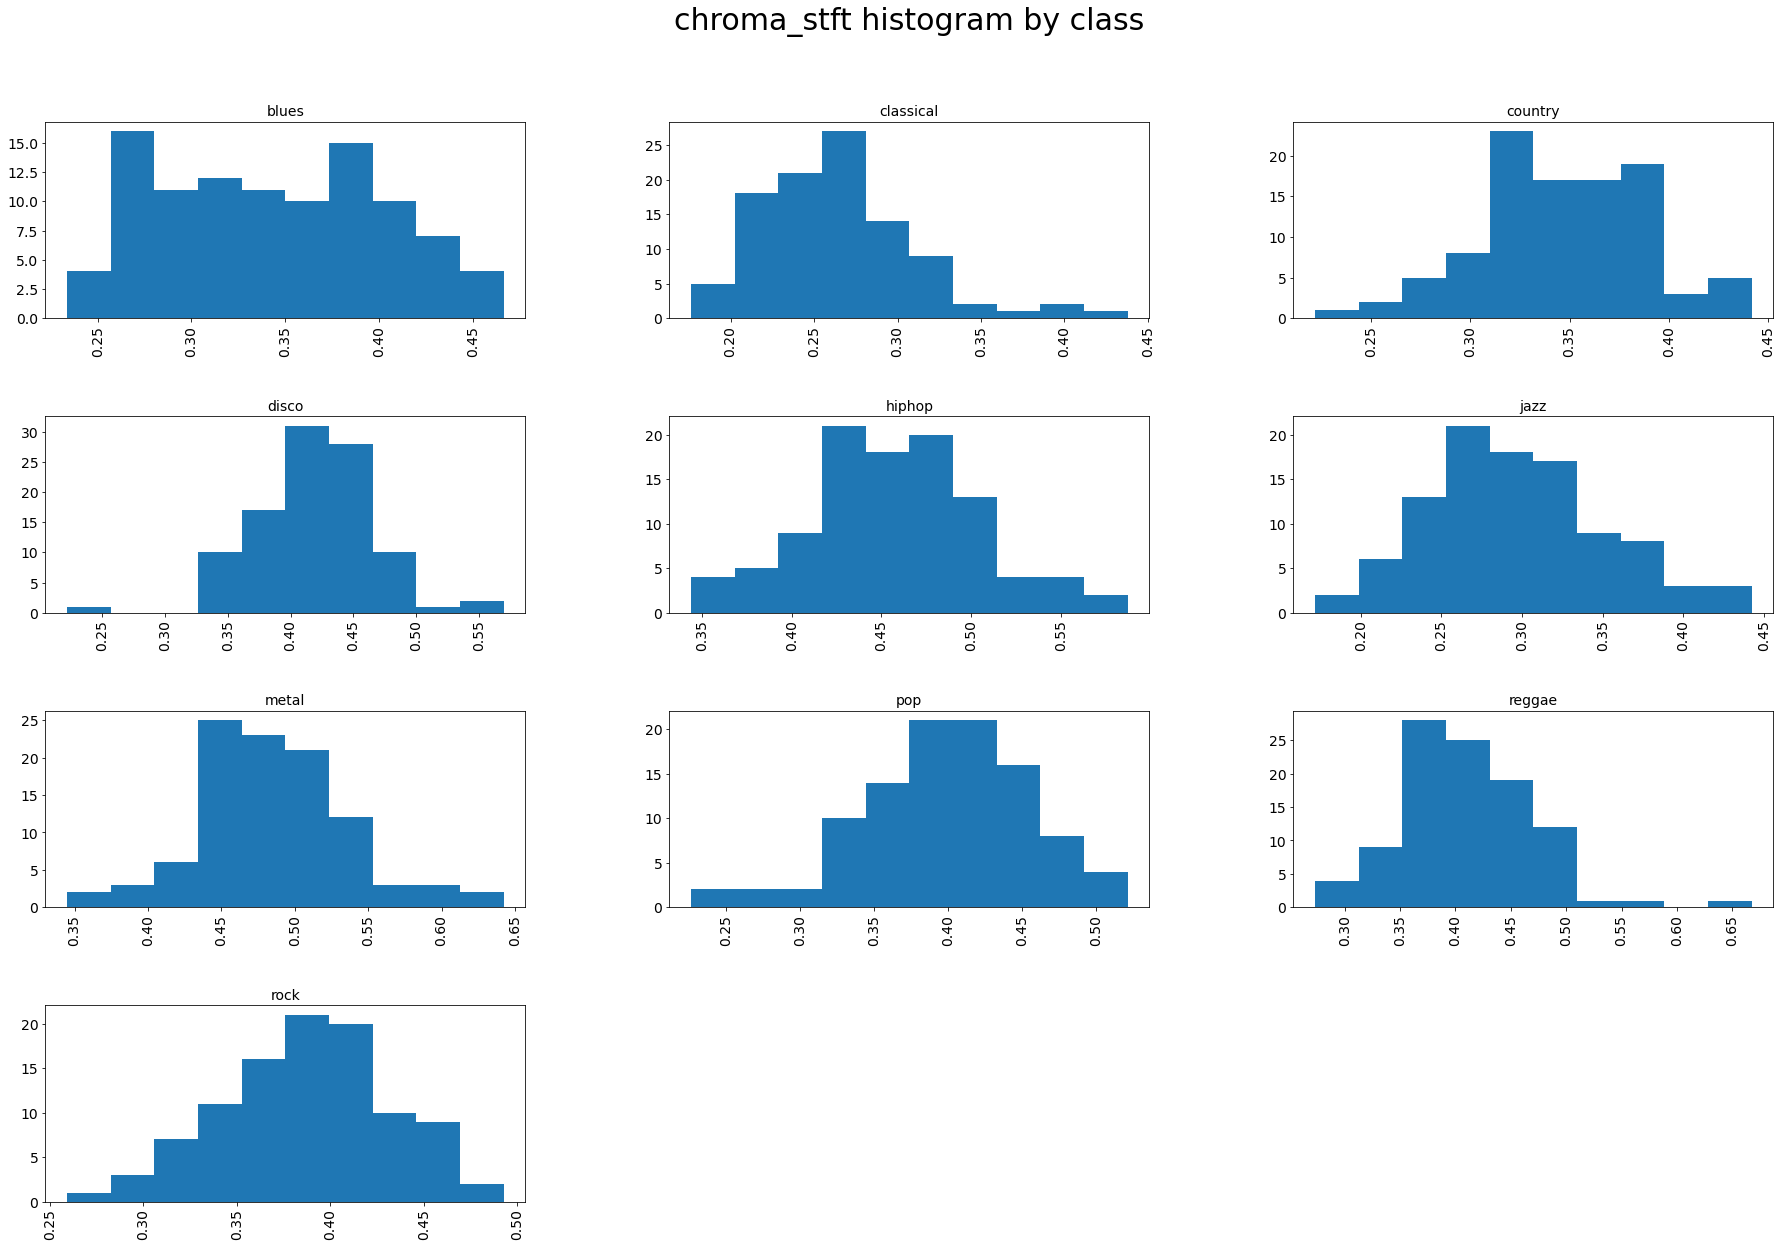

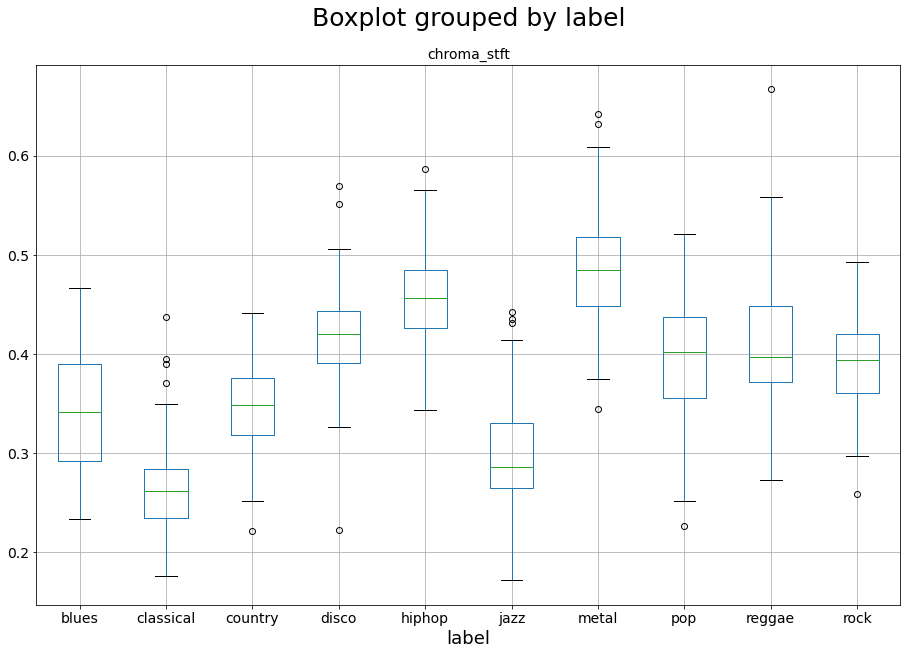

In [22]:
plot_histograms(df, "chroma_stft")
plot_boxes(df, "chroma_stft")

### rmse

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:357: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


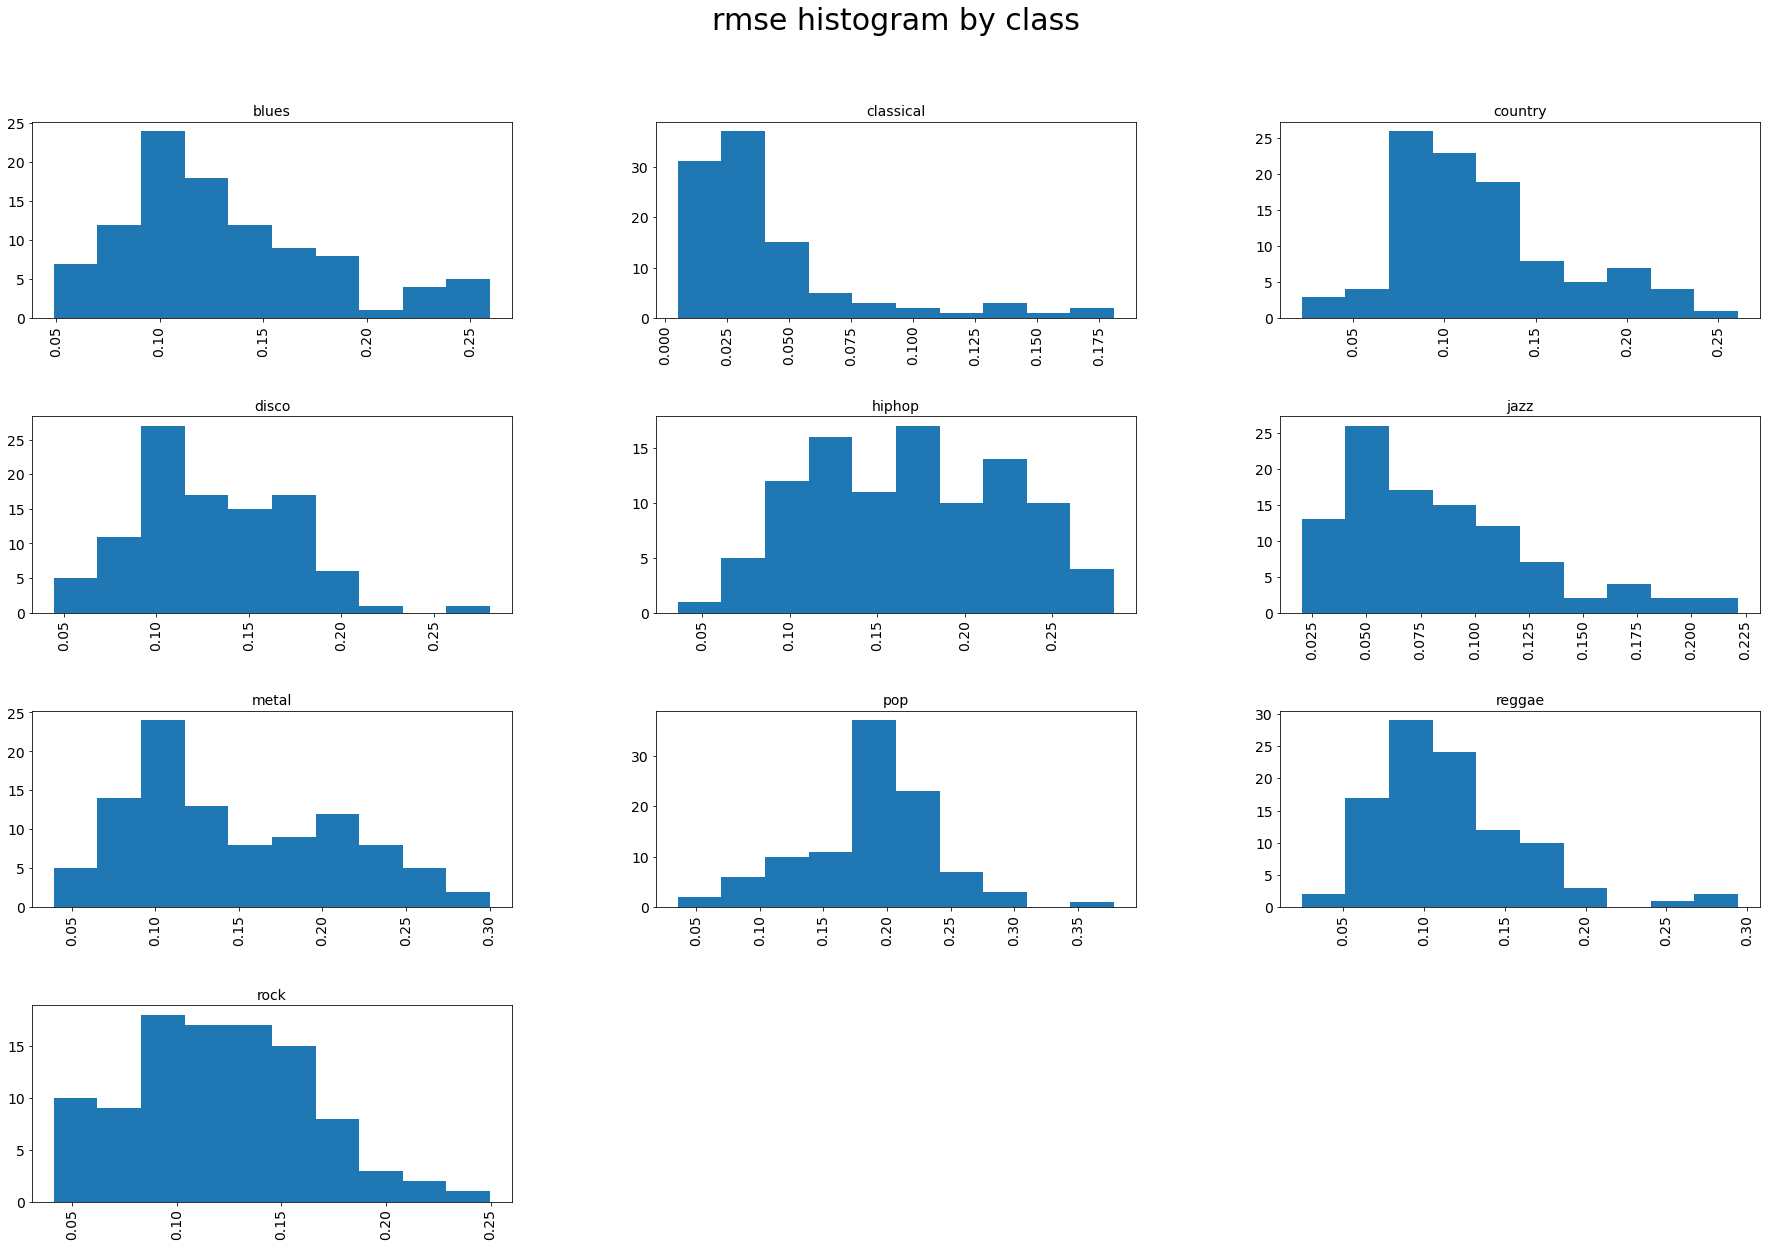

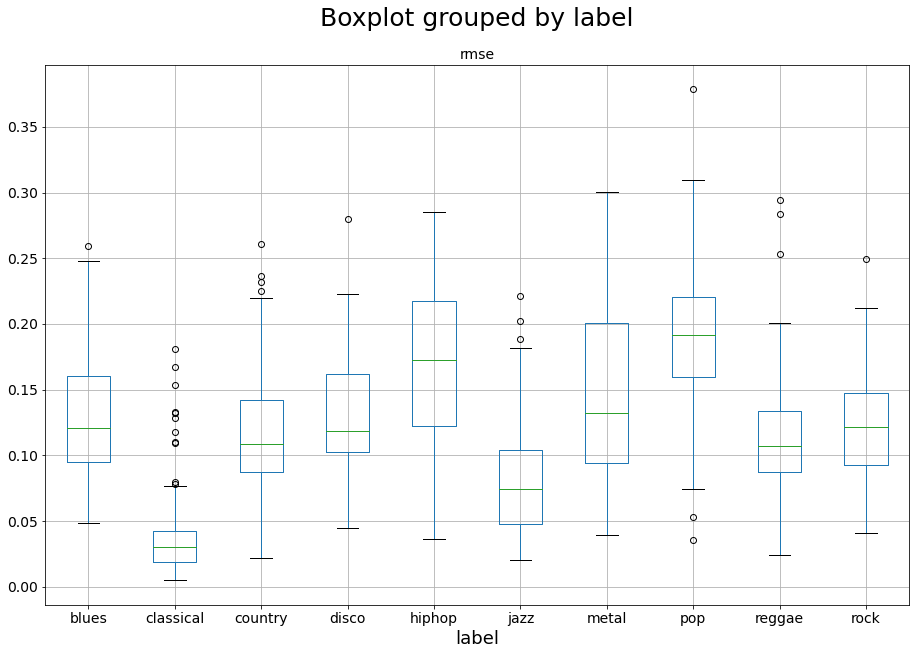

In [23]:
plot_histograms(df, "rmse")
plot_boxes(df, "rmse")

### spectral_bandwidth

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:357: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


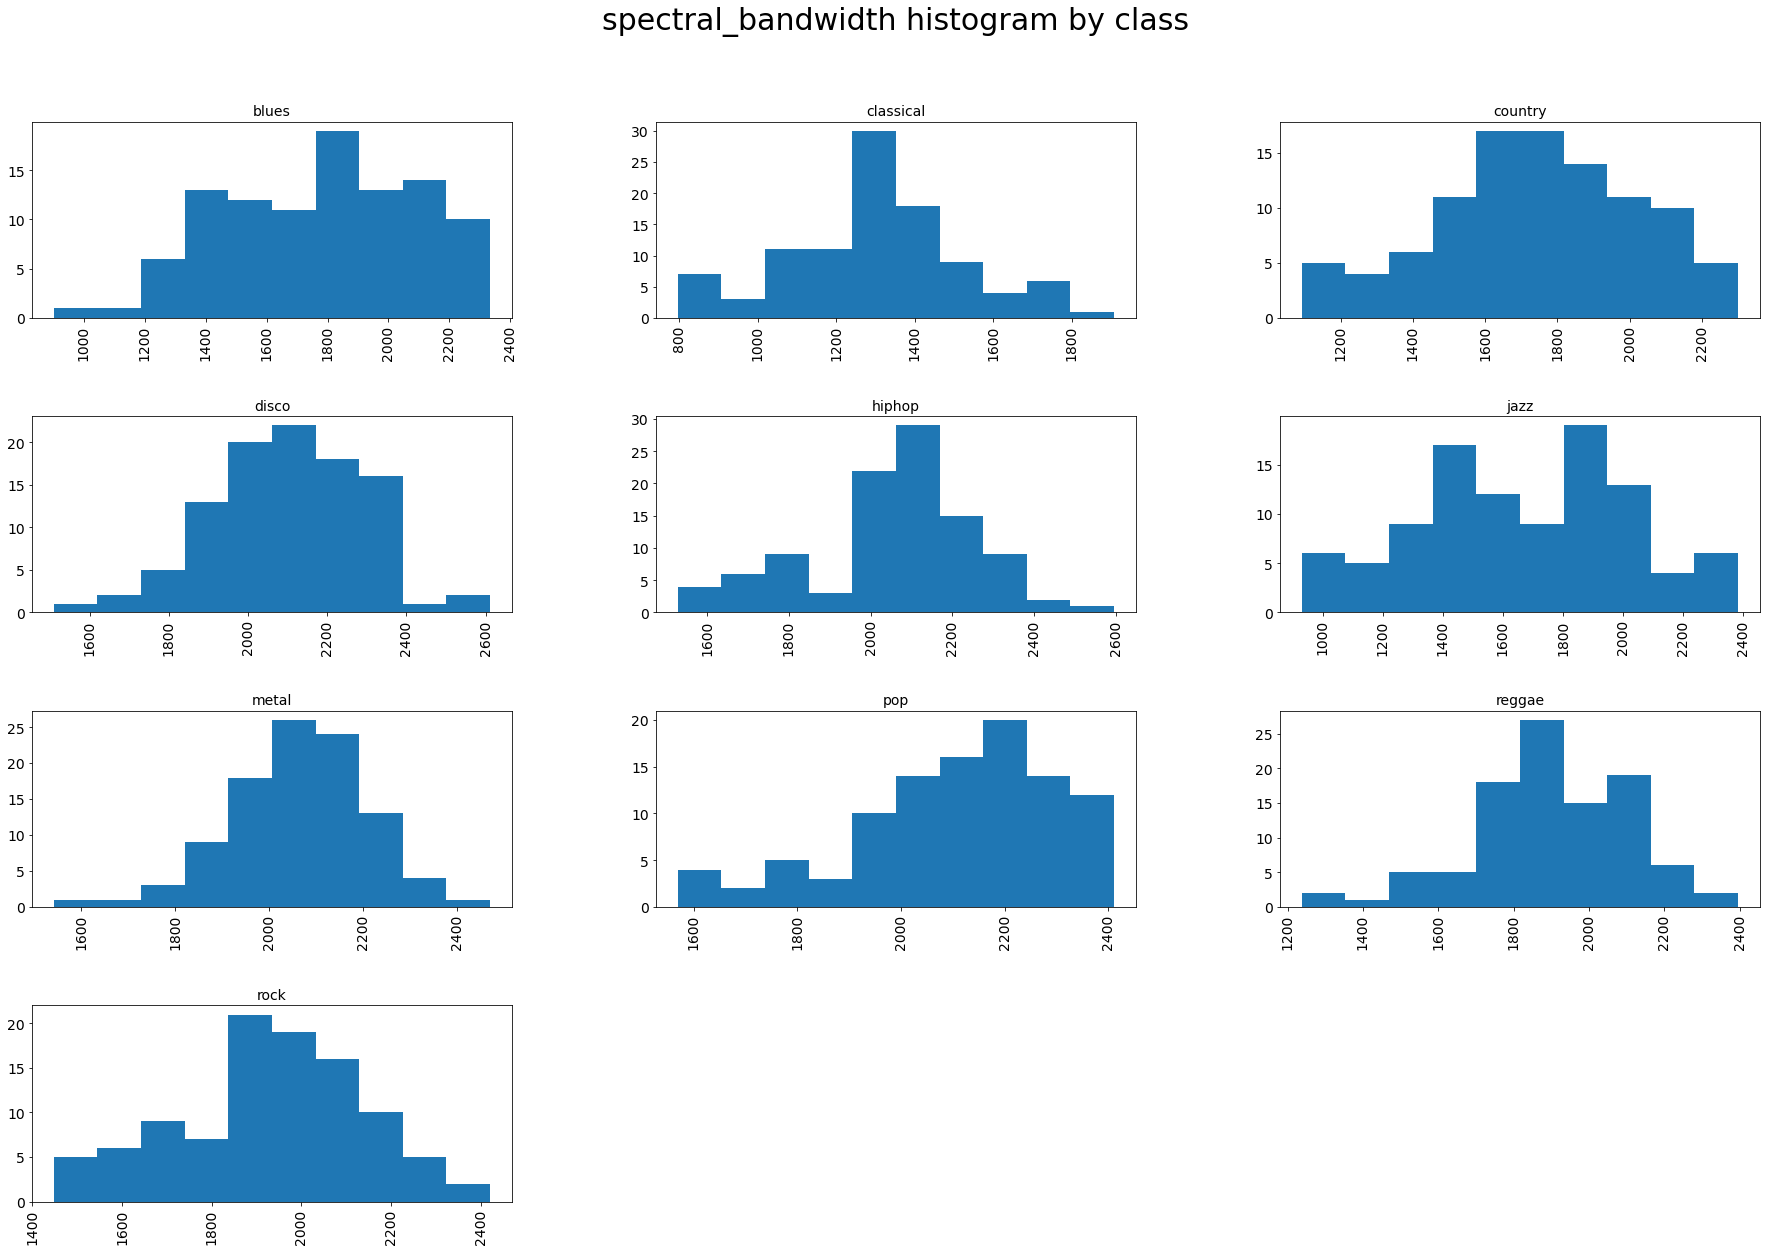

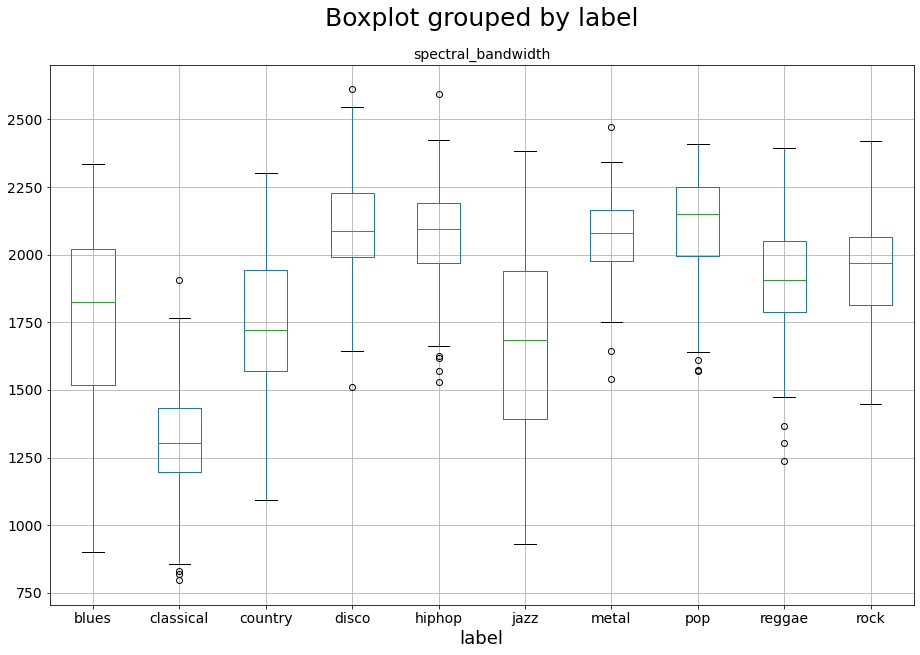

In [24]:
plot_histograms(df, "spectral_bandwidth")
plot_boxes(df, "spectral_bandwidth")

### rolloff

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:357: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


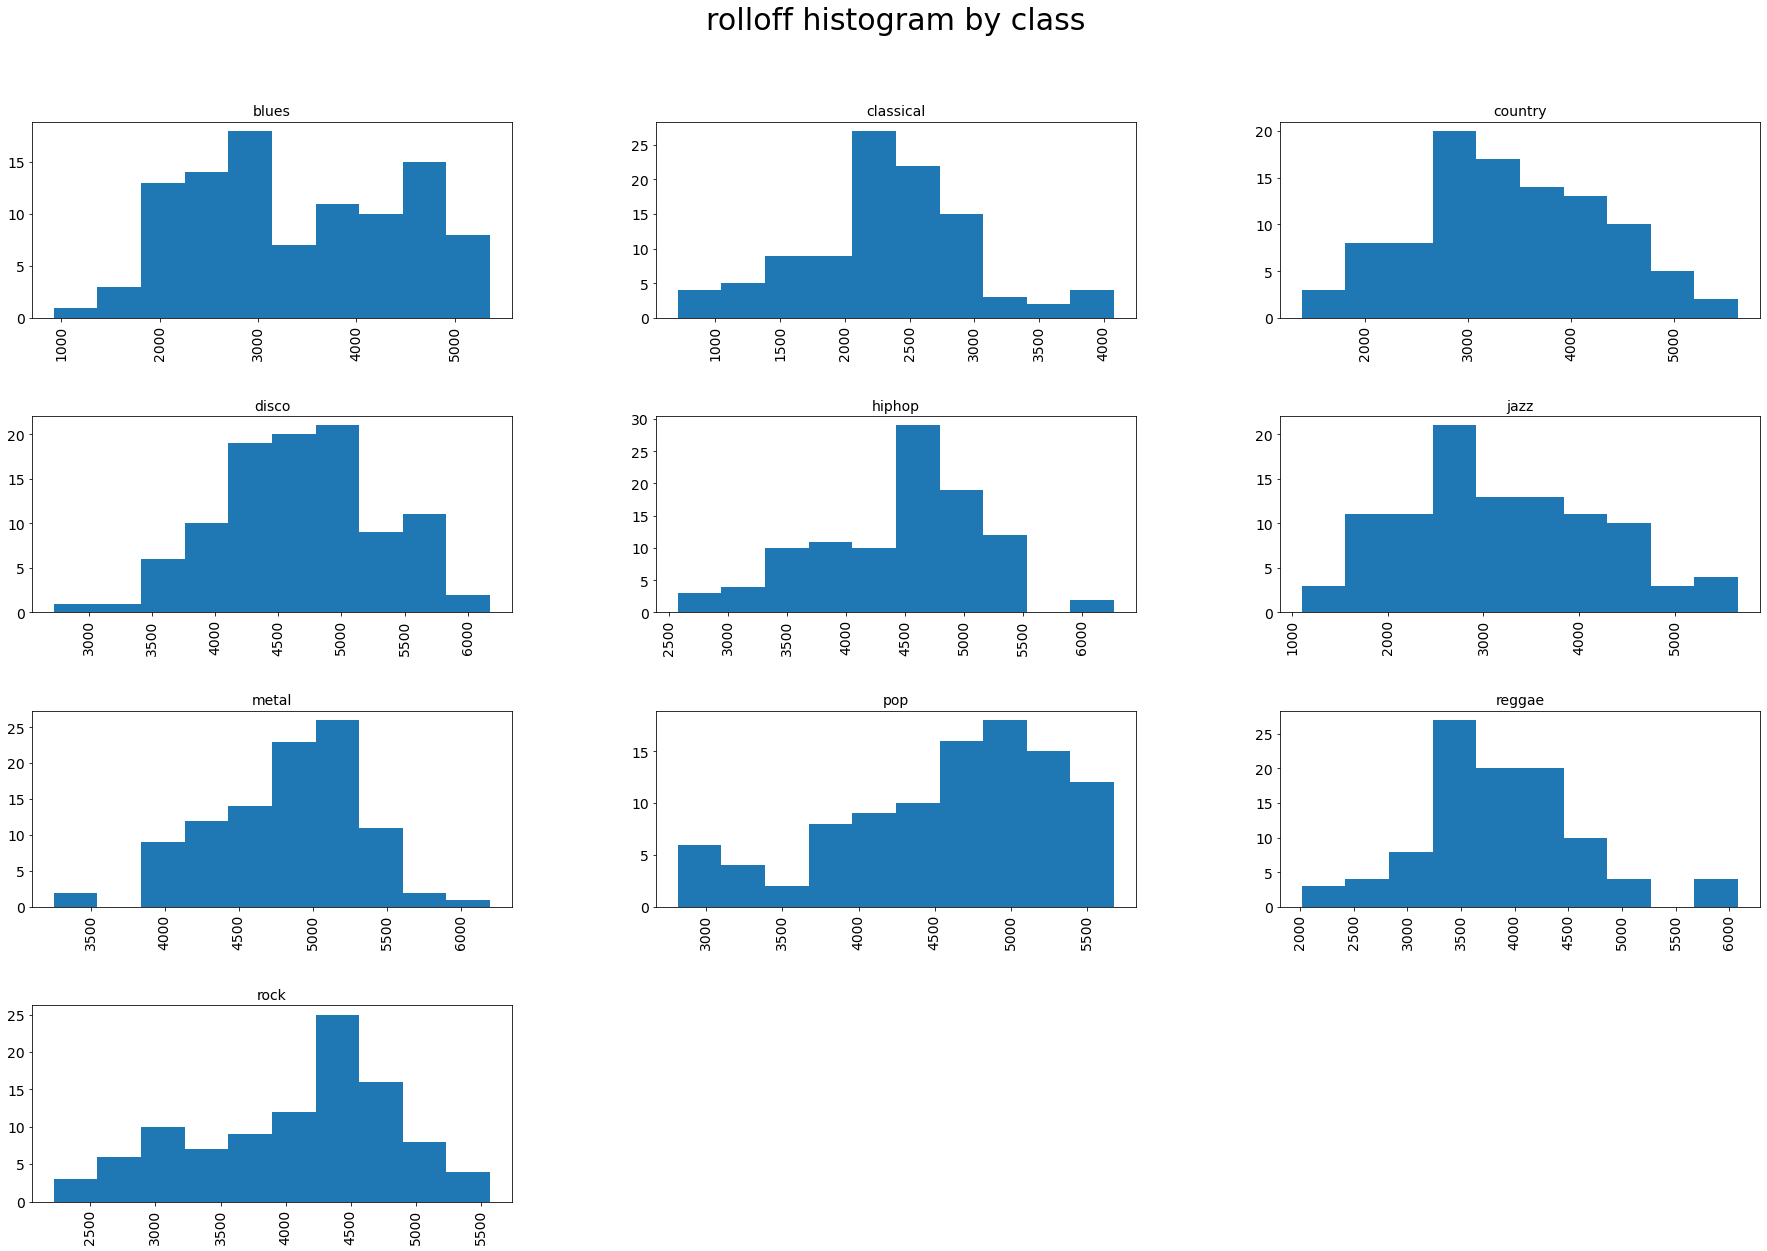

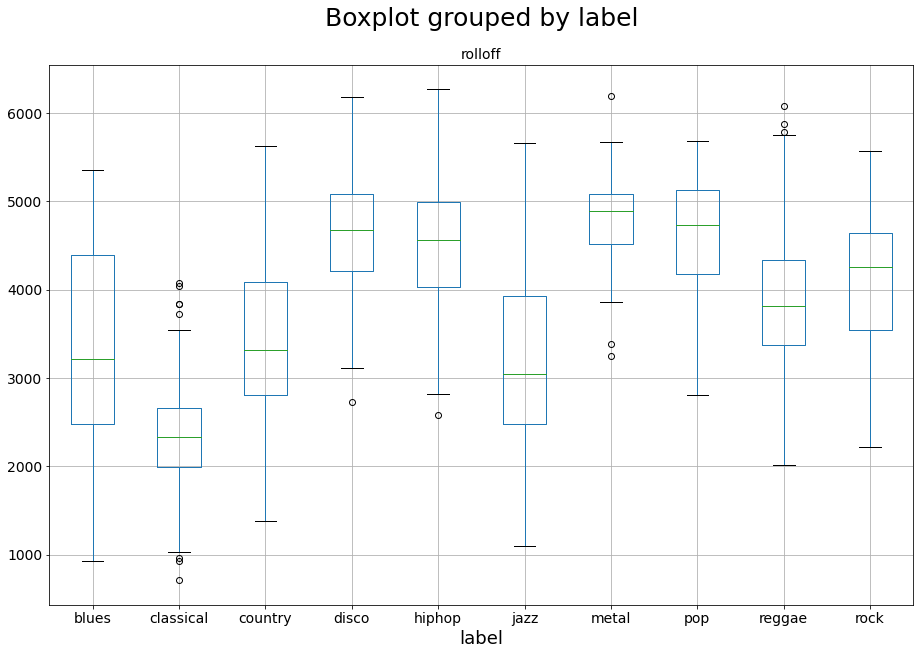

In [25]:
plot_histograms(df, "rolloff")
plot_boxes(df, "rolloff")

### zero_crossing_rate

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:357: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


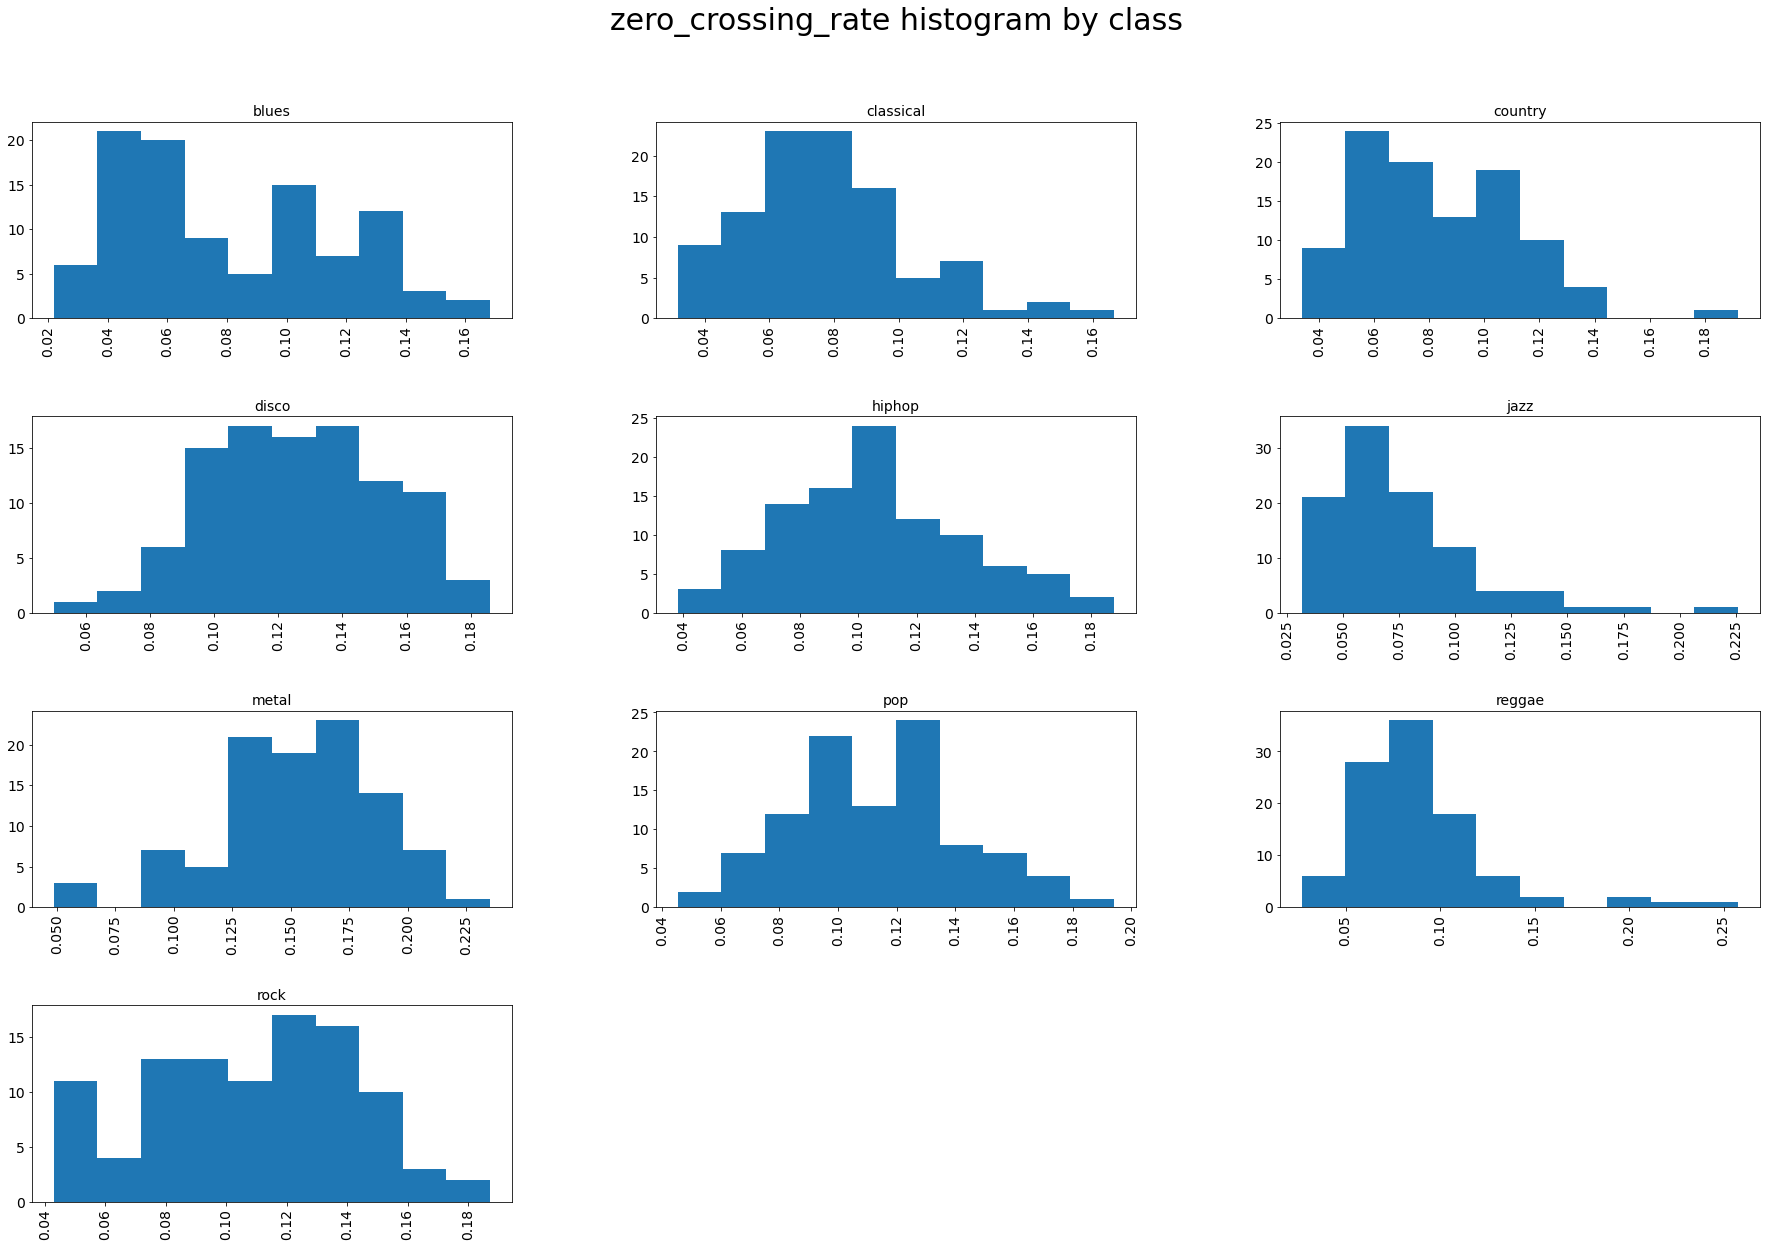

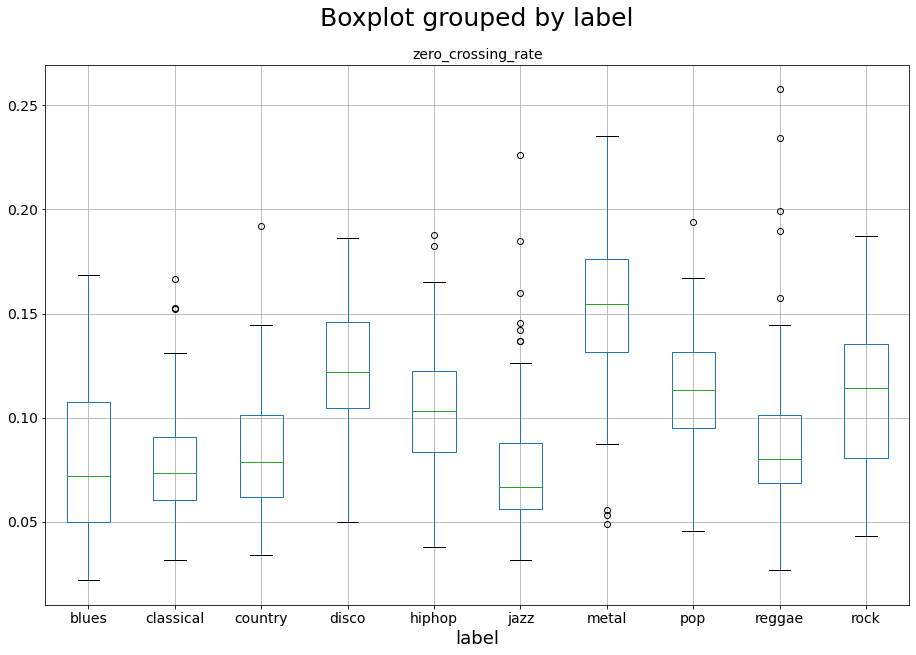

In [26]:
plot_histograms(df, "zero_crossing_rate")
plot_boxes(df, "zero_crossing_rate")

### mfcc16

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:357: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


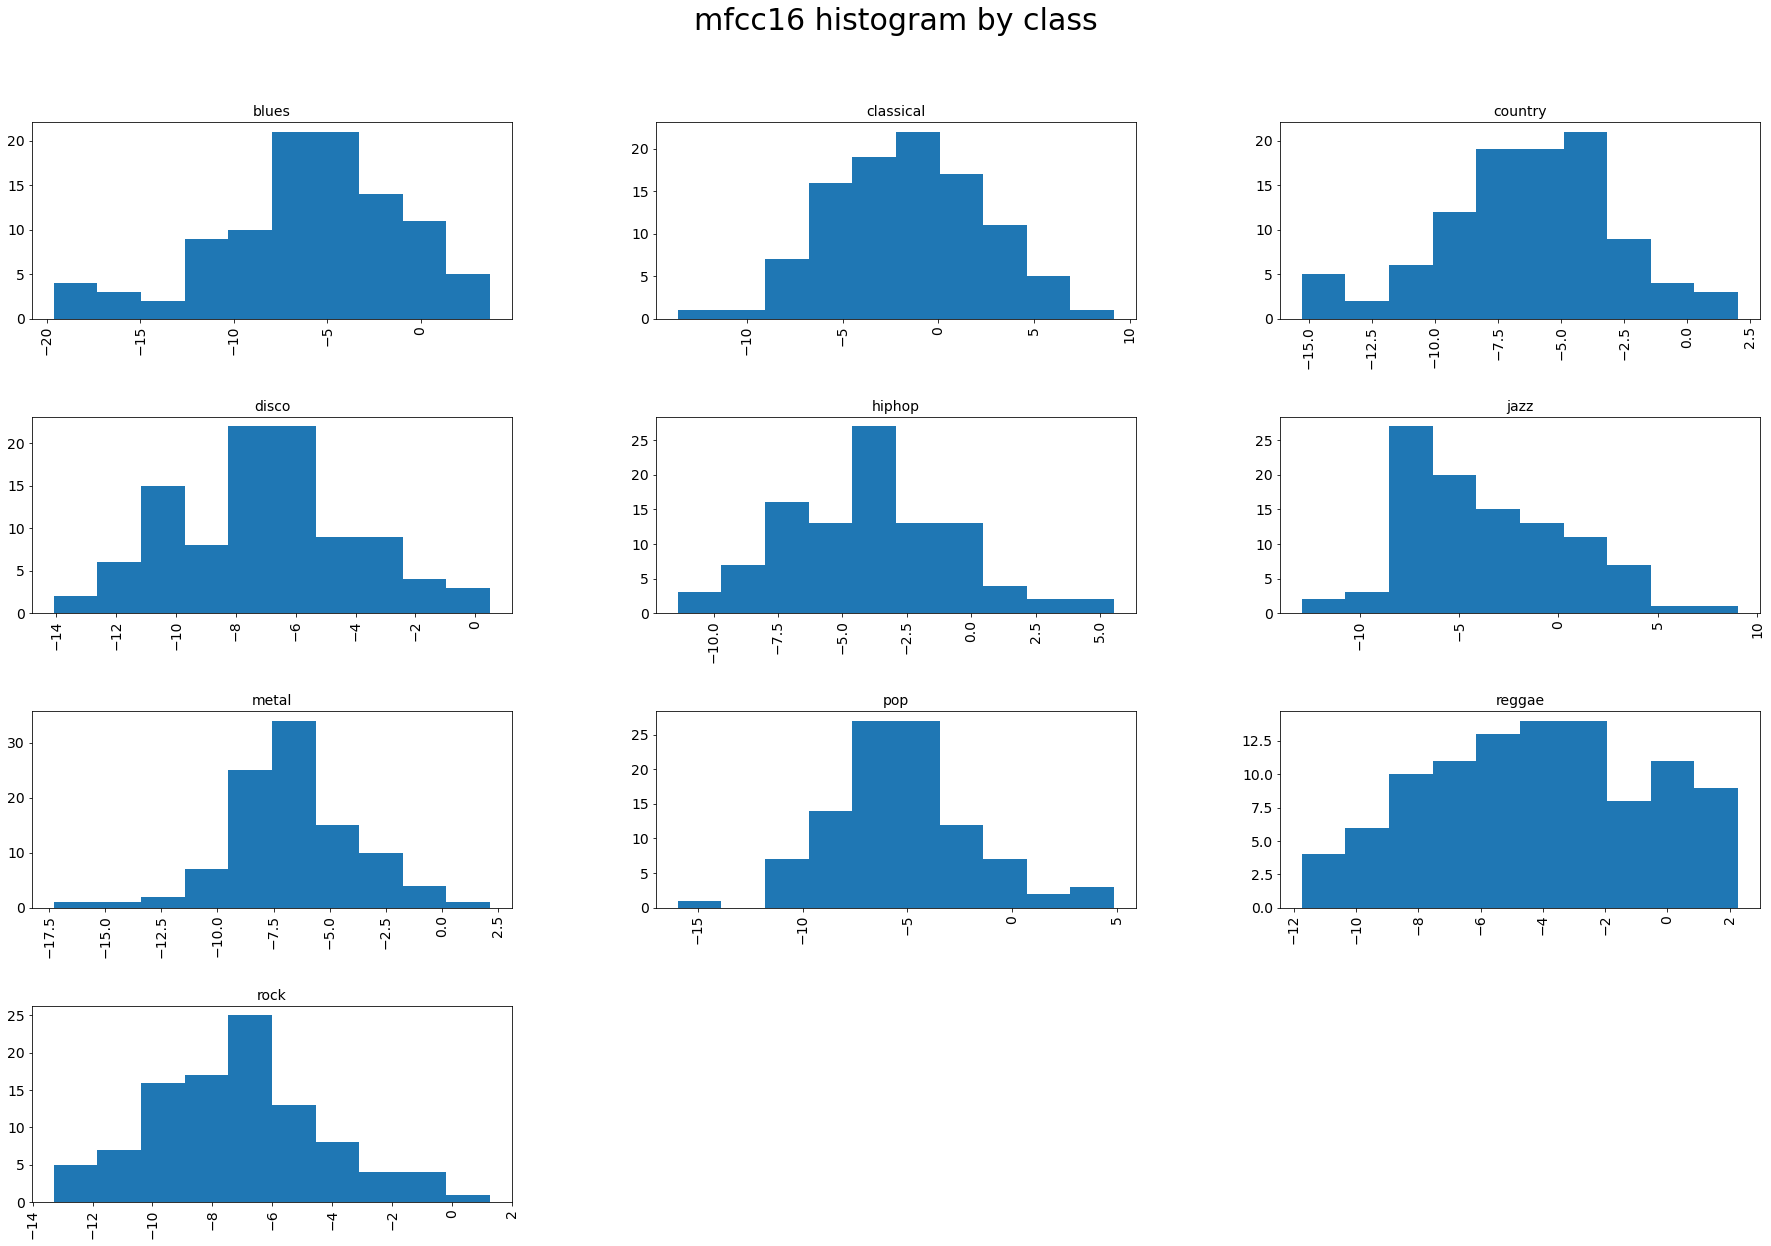

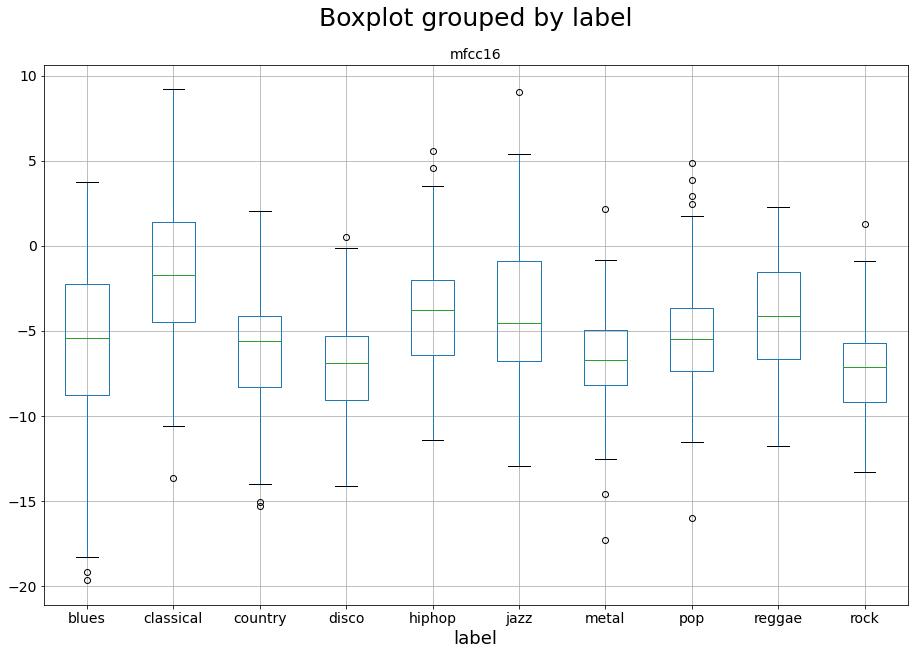

In [27]:
plot_histograms(df, "mfcc16")
plot_boxes(df, "mfcc16")

### mfcc1

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:357: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


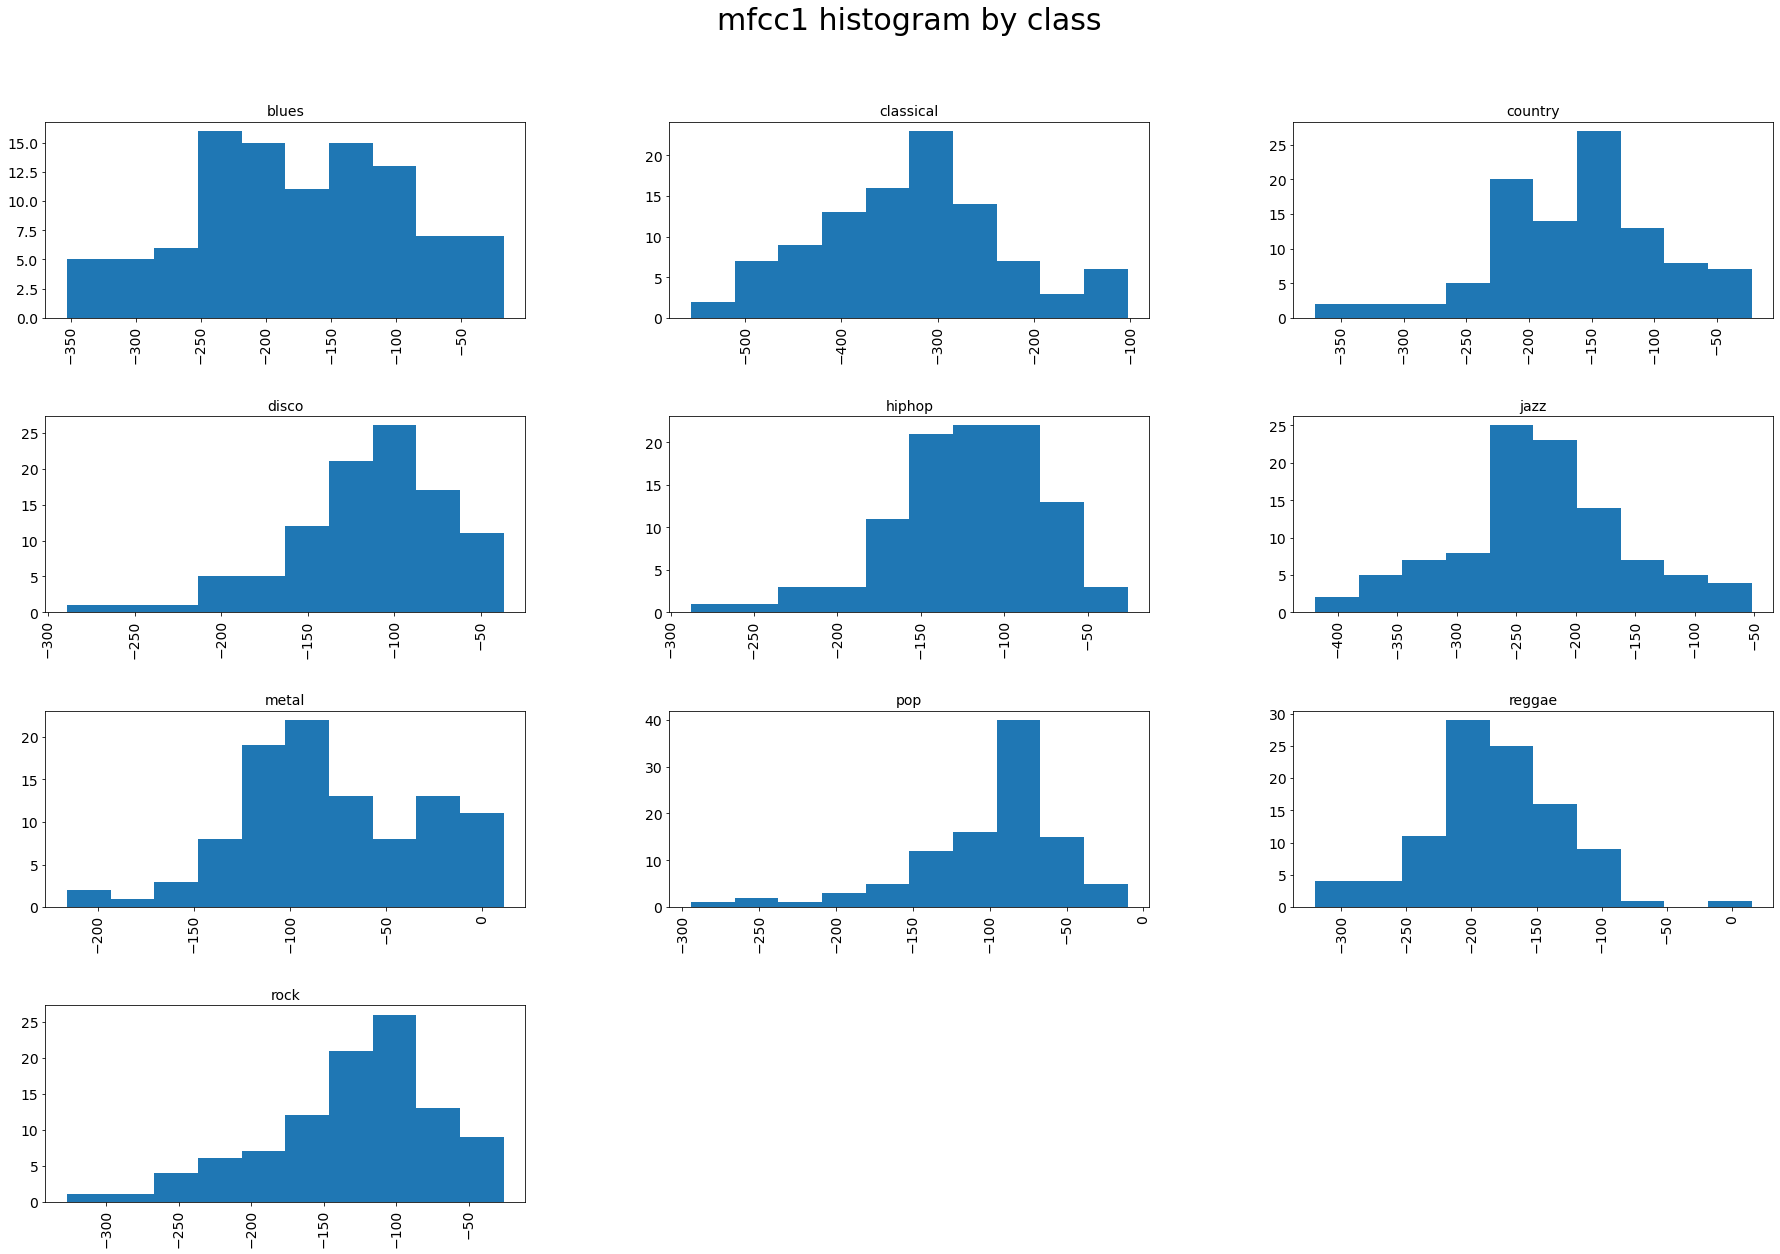

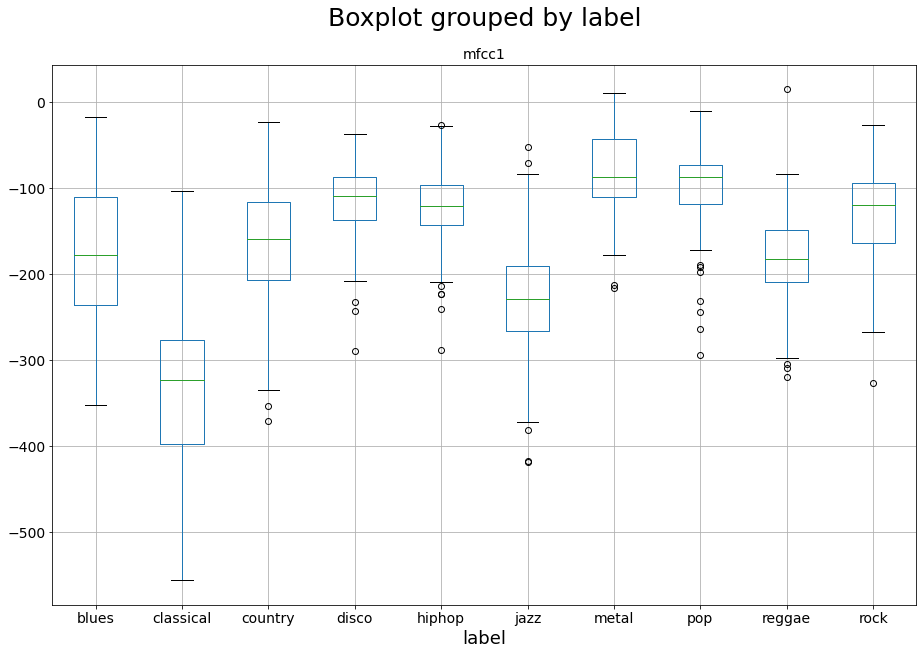

In [28]:
plot_histograms(df, "mfcc1")
plot_boxes(df, "mfcc1")

## Cluster Analysis

### Hopkins Method

By plotting the PCA, the data seems too be split mixed up between music genres.

Let's verify the Hopkins score in order to determine the cluster tendency of the dataset. 
The closer the value to 1, the higher the likelihood of clusters (minimum value is 0). 

_source: https://matevzkunaver.wordpress.com/2017/06/20/hopkins-test-for-cluster-tendency/_

In [29]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins_score = hopkins(X)

print("Hopkins score: %d" % hopkins_score)

Hopkins score: 0


The Hopkins score being 0, it's unlikely the dataset has a tendency for clusters.

In [30]:
from sklearn import cluster, metrics
     
scores = {}
    
start_range = 2
end_range = 22

for i in range(start_range,end_range):
    km = cluster.KMeans(i)
    km.fit(X)
    
    error = km.inertia_
    s_score = metrics.silhouette_score(X, km.labels_)
    
    scores[i] = {"silhouette": s_score, "error": error} 

### KMean, Elbow Method and Silhouette Score 

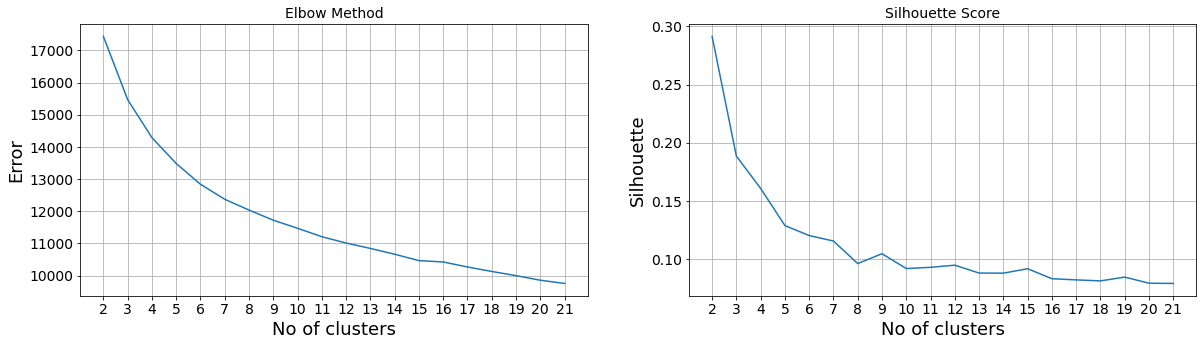

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))


ax[0].plot(range(start_range,end_range), [v["error"] for v in scores.values()])

ax[0].set_xticks(range(start_range,end_range))
ax[0].set_title("Elbow Method")
ax[0].set_xlabel("No of clusters")
ax[0].set_ylabel("Error")
ax[0].grid()


ax[1].plot(range(start_range,end_range), [v["silhouette"] for v in scores.values()])

ax[1].set_xticks(range(start_range,end_range))
ax[1].set_title("Silhouette Score")
ax[1].set_xlabel("No of clusters")
ax[1].set_ylabel("Silhouette")
ax[1].grid()


We are supposed to have 10 different genres in our dataset, however here the silhouette and the elbow method indicate that the best number of clusters is between 2 and 4, which is different from the genre groups.

Additionnaly, maximum silhouette score (for k = 2) is around 0.28 which is quite low since in theory Silhouette  is between -1 and 1 (1 meaning that the clusters are dense and well separated, 0 that the clusters are overlapping and -1 that data belong to the wrong clusters).

The dataset clearly does not seem to have a single clear cluster for each music genre. 

However the score of 0.28 for k=2 could potentially indicated that some genres can be grouped in two extra categories. Which could be an interesting feature to use.

### Traininig a simple Neural network

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
encoder.fit(y)

y_encoded = encoder.transform(y)


X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_encoded)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Input(shape=X.shape[1:]),
    Dense(600, activation="relu"),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy", # because classes are exclusive or else we would use  categorical_crossentropy
             optimizer=SGD(learning_rate=0.01), # Stochastic Gradient Descent, will use backpropoagation (reverse mode autodiff + Gradient Descent
             metrics=["accuracy"],)

model.summary()

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 600)               16200     
_________________________________________________________________
dense_1 (Dense)              (None, 300)               180300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 227,610
Trainable params: 227,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 0s 10ms/step - loss: 2.2825 - accuracy: 0.1139 - val_loss: 2.2361 - val_accuracy: 0.1436
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 2.2186 - accuracy: 0.2082 - val_l

8/8 [==============================] - 0s 1ms/step - loss: 1.0357 - accuracy: 0.6320


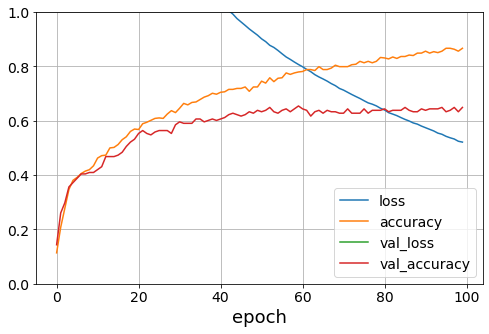

In [34]:
mse_test = model.evaluate(X_test, y_test)

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("epoch")
plt.show()

Class 0: blues
Class 1: classical
Class 2: country
Class 3: disco
Class 4: hiphop
Class 5: jazz
Class 6: metal
Class 7: pop
Class 8: reggae
Class 9: rock


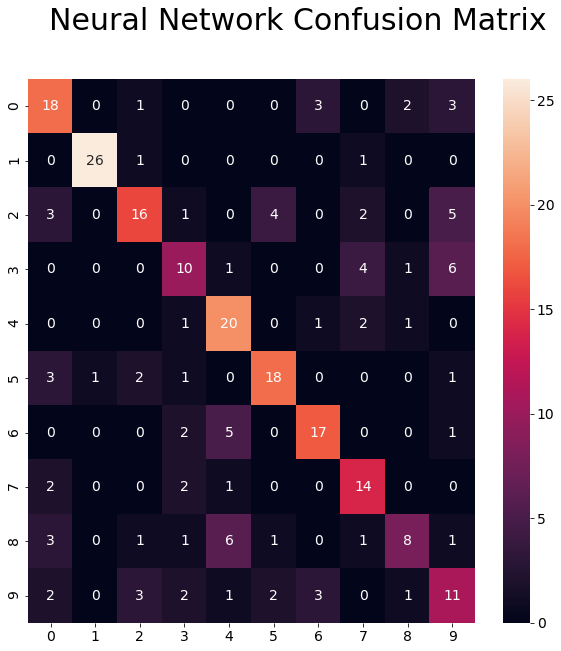

In [56]:
from sklearn.metrics import confusion_matrix

y_pred_nn = np.argmax(model.predict(X_test), axis=-1)


def show_confusion_matrix(y_true, y_pred, encoder, title=""):
    for number, classname in enumerate(encoder.classes_):
        print(f"Class {number}: {classname}")

    fig, ax = plt.subplots(1, figsize=(10,10))
    
    fig.suptitle(title, fontsize=30)
    cf_matrix = confusion_matrix(y_test, y_pred)
    sb.heatmap(cf_matrix, annot=True, ax=ax)
    plt.show()

show_confusion_matrix(y_test, y_pred_nn, encoder, "Neural Network Confusion Matrix")

### Traininig an RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 30, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf = RandomForestClassifier()


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42)

rf_random.fit(X_train_full, y_train_full)

rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=6, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=6, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=6, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=6, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=6, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=6, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=6, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=6, bootstrap=True, tot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.1s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.1s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.1s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.1s
[CV] n_estimators=30, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 
[CV]  n_estimators=30, min_samples_split=5, min_sam

[CV]  n_estimators=25, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=12, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=12, bootstrap=False 
[CV]  n_estimators=25, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=12, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=12, bootstrap=False 
[CV]  n_estimators=25, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=12, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=12, bootstrap=False 
[CV]  n_estimators=25, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=12, bootstrap=False, total=   0.1s
[CV] n_estimators=45, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=False 
[CV]  n_estimators=45, min_samples_sp

[CV]  n_estimators=45, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=12, bootstrap=False, total=   0.1s
[CV] n_estimators=45, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=12, bootstrap=False 
[CV]  n_estimators=45, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=12, bootstrap=False, total=   0.1s
[CV] n_estimators=45, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=12, bootstrap=False 
[CV]  n_estimators=45, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=12, bootstrap=False, total=   0.1s
[CV] n_estimators=45, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=12, bootstrap=False 
[CV]  n_estimators=45, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=12, bootstrap=False, total=   0.1s
[CV] n_estimators=15, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=18, bootstrap=False 
[CV]  n_estimators=15, min_samples_s

[CV]  n_estimators=35, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=21, bootstrap=True, total=   0.1s
[CV] n_estimators=35, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=21, bootstrap=True 
[CV]  n_estimators=35, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=21, bootstrap=True, total=   0.1s
[CV] n_estimators=45, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=45, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   0.1s
[CV] n_estimators=45, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=45, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   0.1s
[CV] n_estimators=45, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=45, min_samples

[CV]  n_estimators=30, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=True, total=   0.0s
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=False 
[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.0s
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=False 
[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.0s
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=False 
[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.0s
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=False 
[CV]  n_estimators=30, min_samples_spl

[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=27, bootstrap=True, total=   0.0s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=27, bootstrap=True 
[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=27, bootstrap=True, total=   0.0s
[CV] n_estimators=20, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=20, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   0.0s
[CV] n_estimators=20, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=20, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   0.1s
[CV] n_estimators=20, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=20, min_samples

[CV]  n_estimators=25, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.1s
[CV] n_estimators=25, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=25, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.1s
[CV] n_estimators=25, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=25, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.1s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=24, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=24, bootstrap=True, total=   0.1s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=24, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, 

[CV]  n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=False 
[CV]  n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=False 
[CV]  n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=False 
[CV]  n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=False 
[CV]  n_estimators=25, min_samples_split=5, 

[CV]  n_estimators=5, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=12, bootstrap=True, total=   0.0s
[CV] n_estimators=5, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=12, bootstrap=True 
[CV]  n_estimators=5, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=12, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samp

[CV]  n_estimators=35, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=18, bootstrap=True, total=   0.1s
[CV] n_estimators=35, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=18, bootstrap=True 
[CV]  n_estimators=35, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=18, bootstrap=True, total=   0.1s
[CV] n_estimators=25, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False 
[CV]  n_estimators=25, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False 
[CV]  n_estimators=25, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False 
[CV]  n_estimators=25, min_samples

[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=24, bootstrap=True, total=   0.1s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=24, bootstrap=True 
[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=24, bootstrap=True, total=   0.1s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=24, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=24, bootstrap=False, total=   0.0s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=24, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=24, bootstrap=False, total=   0.0s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=24, bootstrap=False 
[CV]  n_estimators=10, min_samples

[CV]  n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=27, bootstrap=True, total=   0.1s
[CV] n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=27, bootstrap=True 
[CV]  n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=27, bootstrap=True, total=   0.1s
[CV] n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=27, bootstrap=True 
[CV]  n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=27, bootstrap=True, total=   0.1s
[CV] n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=27, bootstrap=True 
[CV]  n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=27, bootstrap=True, total=   0.1s
[CV] n_estimators=25, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=27, bootstrap=True 
[CV]  n_estimators=25, min_samples_split=5, 

[CV]  n_estimators=25, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.0s
[CV] n_estimators=25, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=25, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.0s
[CV] n_estimators=25, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=25, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.0s
[CV] n_estimators=15, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=15, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.0s
[CV] n_estimators=15, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=15, min_samples_split=

[CV]  n_estimators=5, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=27, bootstrap=False, total=   0.0s
[CV] n_estimators=5, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=27, bootstrap=False 
[CV]  n_estimators=5, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=27, bootstrap=False, total=   0.0s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=True, total=   0.1s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=True, total=   0.1s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_s

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   32.0s finished


{'n_estimators': 45,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': True}

In [58]:
from sklearn.metrics import accuracy_score

best_random = rf_random.best_estimator_

y_pred = best_random.predict(X_test)

accuracy_score(y_test, y_pred)

0.612

Class 0: blues
Class 1: classical
Class 2: country
Class 3: disco
Class 4: hiphop
Class 5: jazz
Class 6: metal
Class 7: pop
Class 8: reggae
Class 9: rock


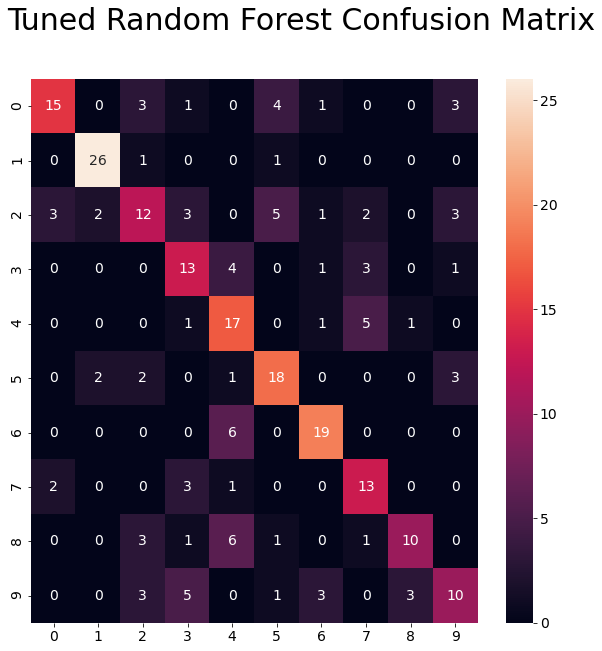

In [57]:
from sklearn.metrics import plot_confusion_matrix


y_pred_rf = best_random.predict(X_test)

show_confusion_matrix(y_test, y_pred_rf, encoder, "Tuned Random Forest Confusion Matrix")